In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from persiantext import PersianText

# Globals

In [14]:
__FONT__ = './resources/IRANSansWeb(FaNum).ttf'
__RENT_STR__ = 'اجاره'
__SELL_STR__ = 'فروش'
__OTHER_STR__ = 'سایر'
__BASE_YEAR__ = 1399


In [134]:
def get_font_properties(fontsize=10):
    return fm.FontProperties(fname=__FONT__, size=fontsize)

def convert_persian_digits_to_latin(s):
    digits = {'۰':'0', '۱':'1', '۲':'2', '۳':'3', '۴':'4', '۵':'5', '۶':'6', '۷':'7', '۸':'8', '۹':'9'}
    if type(s) == str:
        for pd in digits.keys():
            s = s.replace(pd, digits[pd])
    return s

def reshape_axes_labels(ax, reshape_x=True, reshape_y=False, fontsize=10):
    fp = get_font_properties(fontsize=fontsize)
    if reshape_x:
        xt = ax.get_xticklabels()
        for t in xt:
            t.set_text(PersianText.reshape(t.get_text()))
            t.set_fontproperties(fp)
        ax.set_xticklabels(xt)
    if reshape_y:
        yt = ax.get_yticklabels()
        for t in yt:
            t.set_text(PersianText.reshape(t.get_text()))
            t.set_fontproperties(fp)
        ax.set_yticklabels(yt)
    return

def stacked_bar(stacked_group, x, data, title=None, grid_cell=None, figsize=None):
    agg = data.groupby(by=[stacked_group, x]).count().iloc[:,0]
    agg = agg.unstack().T.fillna(0)
    
    bottom = np.zeros(len(agg))
    if grid_cell:
        ax = plt.subplot(grid_cell)
    else:
        plt.figure(figsize=figsize)
        ax = plt.subplot()
    
    for col in agg.columns:
        ax.bar(agg.index, agg[col], label=col, bottom=bottom)
        bottom = bottom + np.array(agg[col])
        
    if title:
        ax.set_title(PersianText.reshape(title), fontproperties=get_font_properties(20), pad=10)
        
    reshaped_cols = [PersianText.reshape(col) for col in agg.columns]
    ax.legend(labels=reshaped_cols, prop=get_font_properties(15))
    ax.set_xticklabels(agg.index, rotation=45, horizontalalignment='right')
    reshape_axes_labels(ax, fontsize=13)
    return

def count_bar(values, title=None, xlabel=None, ylabel=None, grid_cell=None, figsize=None):
    if grid_cell:
        ax = plt.subplot(grid_cell)
    else:
        plt.figure(figsize=figsize)
        ax = plt.subplot()
    ax = sns.countplot(x=values)
    reshape_axes_labels(ax, fontsize=10)
    plt.xticks(rotation=45, horizontalalignment='right')
    if title:
        plt.title(PersianText.reshape(title), fontproperties=get_font_properties(20))
    if xlabel:
        plt.xlabel(PersianText.reshape(xlabel), fontproperties=get_font_properties(20))
    if ylabel:
        plt.ylabel(PersianText.reshape(ylabel), fontproperties=get_font_properties(20))
    return

def mean_bar(x, y, data, title=None, xlabel=None, ylabel=None, grid_cell=None, figsize=None):
    if grid_cell:
        ax = plt.subplot(grid_cell)
    else:
        plt.figure(figsize=figsize)
        ax = plt.subplot()        
    ax = sns.barplot(x=x, y=y, data=data, errwidth=0)
    reshape_axes_labels(ax, fontsize=10)
    plt.xticks(rotation=45, horizontalalignment='right')
    if title:
        plt.title(PersianText.reshape(title), fontproperties=get_font_properties(20))
    if xlabel:
        plt.xlabel(PersianText.reshape(xlabel), fontproperties=get_font_properties(20))
    if ylabel:
        plt.ylabel(PersianText.reshape(ylabel), fontproperties=get_font_properties(20))
    return

def swarm(x, y, data, hue=None, title=None, xlabel=None, ylabel=None, legend_title=None, grid_cell=None, figsize=None):
    if grid_cell:
        ax = plt.subplot(grid_cell)
    else:
        plt.figure(figsize=figsize)
        ax = plt.subplot()        
    ax = sns.swarmplot(x=x, y=y, data=data, hue=hue)
    reshape_axes_labels(ax, fontsize=10)
    plt.xticks(rotation=45, horizontalalignment='right')
    if title:
        plt.title(PersianText.reshape(title), fontproperties=get_font_properties(20))
    if xlabel:
        plt.xlabel(PersianText.reshape(xlabel), fontproperties=get_font_properties(20))
    if ylabel:
        plt.ylabel(PersianText.reshape(ylabel), fontproperties=get_font_properties(20))
    if legend_title:
        plt.legend(title=PersianText.reshape(legend_title), prop=get_font_properties(10))
    return

def heatmap(data, title=None, xlabel=None, ylabel=None, cbar_label='', grid_cell=None, figsize=None):
    if grid_cell:
        ax = plt.subplot(grid_cell)
    else:
        plt.figure(figsize=figsize)
        ax = plt.subplot()
    if cbar_label:
        cbar_label = PersianText.reshape(cbar_label)
    ax = sns.heatmap(data, cmap='tab20b_r', cbar_kws={'label':cbar_label})
    reshape_axes_labels(ax, reshape_y=True, fontsize=10)
    plt.xticks(rotation=45, horizontalalignment='right')
    if title:
        plt.title(PersianText.reshape(title), fontproperties=get_font_properties(20), pad=15)
    if xlabel:
        plt.xlabel(PersianText.reshape(xlabel), fontproperties=get_font_properties(20))
    if ylabel:
        plt.ylabel(PersianText.reshape(ylabel), fontproperties=get_font_properties(20))
    return


In [15]:
__CITY_NAME_FA__ = 'اصفهان'
# __CITY_NAME_FA__ = 'مشهد'
# __CITY_NAME_FA__ = 'شیراز'

df = pd.read_json('./data/isfahan--real-estate.json')
# df = pd.read_json('./data/mashhad--real-estate.json')
# df = pd.read_json('./data/shiraz--real-estate.json')

In [16]:
# df.describe().T
# df.isnull().sum()

# Preparing data

In [17]:
#df.isnull().sum()

# del_cols = ['تلفن', 'اجاره روزانه', 'مایل به معاوضه', 'سند اداری', 'بالکن', 'آگهی‌دهنده',
#             'طبقه', 'ودیعه و اجاره', 'مناسب برای', 'کد ملی صاحب آگهی']

# for col in del_cols:
#     try:
#         del df[col]
#     except KeyError as ex:
#         print(ex, 'Not found!')
#         continue


In [18]:
#df.isnull().sum()
filter_cols = ['post_id', 'get_date', 'post_date', 'main_category', 'sub_category',
               'دسته‌بندی', 'محل', 'متراژ', 'سال ساخت', 'تعداد اتاق', 'ودیعه',
               'اجاره', 'قیمت کل', 'قیمت هر متر']
df = df[filter_cols]
df.columns = ['post_id', 'get_date', 'post_date', 'main_category', 'sub_category',
              'category', 'location', 'area', 'build_year', 'rooms', 'mortgage', 'rent',
              'sell_price', 'sell_unit_price']

In [19]:
# df['post_date'].value_counts()
# df['main_category'].isnull().sum()

In [20]:
df['area'] = df['area'].apply(lambda x: convert_persian_digits_to_latin(x))
df['area'] = df['area'].apply(lambda x: x.replace(' متر', '') if type(x) == str else x)
df['area'] = df['area'].apply(lambda x: x.replace('٫', '') if type(x) == str else x)
df['area'] = df['area'].str.strip().astype('float')#.astype('Int16')

df['build_year'] = df['build_year'].apply(lambda x: convert_persian_digits_to_latin(x))
df['build_year'] = df['build_year'].apply(lambda x: x.replace('قبل از ', '') if type(x) == str else x)
df['build_year'] = df['build_year'].str.strip().astype('float').astype('Int16')
df['age'] = __BASE_YEAR__ - df['build_year']
df['age'] = df['age'].astype('float')

CNAME = __CITY_NAME_FA__ + '، '
df['location'] = df['location'].apply(lambda x: x.replace(CNAME, '') if type(x) == str else x)

df['main_category'] = df['main_category'].fillna('')

df['ad_type'] = df['main_category'].apply(lambda x: __RENT_STR__ if __RENT_STR__ in x else __SELL_STR__ if __SELL_STR__ in x else __OTHER_STR__)

rooms = {'بدون اتاق':'0',
         'یک':'1',
         'دو':'2',
         'سه':'3',
         'چهار':'4',
         'پنج یا بیشتر':'5'}
for r in rooms.keys():
    df['rooms'] = df['rooms'].apply(lambda x: x.replace(r, rooms[r]) if type(x) == str else x)
df['rooms'] = df['rooms'].str.strip().astype('float').astype('Int16')

df['sell_price'] = df['sell_price'].apply(lambda x: convert_persian_digits_to_latin(x))
df['sell_price'] = df['sell_price'].apply(lambda x: x.replace(' تومان', '') if type(x) == str else x)
df['sell_price'] = df['sell_price'].apply(lambda x: x.replace('٫', '') if type(x) == str else x)
df['sell_price'] = df['sell_price'].replace('توافقی', np.nan)
df['sell_price'] = df['sell_price'].replace('مجانی', np.nan)
df['sell_price'] = df['sell_price'].str.strip().astype('float')#.astype('Int64')

df['sell_unit_price'] = df['sell_unit_price'].apply(lambda x: convert_persian_digits_to_latin(x))
df['sell_unit_price'] = df['sell_unit_price'].apply(lambda x: x.replace(' تومان', '') if type(x) == str else x)
df['sell_unit_price'] = df['sell_unit_price'].apply(lambda x: x.replace('٫', '') if type(x) == str else x)
df['sell_unit_price'] = df['sell_unit_price'].replace('توافقی', np.nan)
df['sell_unit_price'] = df['sell_unit_price'].replace('مجانی', np.nan)
df['sell_unit_price'] = df['sell_unit_price'].str.strip().astype('float')#.astype('Int64')

df['mortgage'] = df['mortgage'].apply(lambda x: convert_persian_digits_to_latin(x))
df['mortgage'] = df['mortgage'].apply(lambda x: x.replace(' تومان', '') if type(x) == str else x)
df['mortgage'] = df['mortgage'].apply(lambda x: x.replace('٫', '') if type(x) == str else x)
df['mortgage'] = df['mortgage'].replace('توافقی', np.nan)
df['mortgage'] = df['mortgage'].replace('مجانی', np.nan)
df['mortgage'] = df['mortgage'].str.strip().astype('float')#.astype('Int64')

df['rent'] = df['rent'].apply(lambda x: convert_persian_digits_to_latin(x))
df['rent'] = df['rent'].apply(lambda x: x.replace(' تومان', '') if type(x) == str else x)
df['rent'] = df['rent'].apply(lambda x: x.replace('٫', '') if type(x) == str else x)
df['rent'] = df['rent'].replace('توافقی', np.nan)
df['rent'] = df['rent'].replace('مجانی', np.nan)
df['rent'] = df['rent'].str.strip().astype('float')#.astype('Int64')

area_cat_labels = (
    'کمتر از ۱۰۰',
    'از ۱۰۰ تا ۲۰۰',
    'از ۲۰۰ تا ۳۰۰',
    'از ۳۰۰ تا ۴۰۰',
    'از ۴۰۰ تا ۵۰۰',
    'بیشتر از ۵۰۰')
df['area_cat'] = pd.cut(df['area'], bins=(0, 100, 200, 300, 400, 500, np.inf), labels=area_cat_labels)

age_cat_labels = (
    'کمتر از ۵',
    'از ۵ تا ۱۰',
    'از ۱۰ تا ۱۵',
    'از ۱۵ تا ۲۰',
    'از ۲۰ تا ۲۵',
    'از ۲۵ تا ۳۰',
    'بیشتر از ۳۰')
df['age_cat'] = pd.cut(df['age'], bins=(-1, 5, 10, 15, 20, 25, 30, np.inf), labels=age_cat_labels)

In [21]:
df2 = df[['location', 'sub_category', 'ad_type', 'age', 'rooms', 'area', 'sell_price', 'sell_unit_price', 'mortgage', 'rent', 'area_cat', 'age_cat']].copy()
df2 = df2[(~df2['sell_price'].isnull()) | (~df2['sell_unit_price'].isnull()) | (~df2['mortgage'].isnull()) | (~df2['rent'].isnull())]

suburbs = ['شاهین شهر', 'بهارستان', 'فولادشهر', 'خمینی شهر', 'شهرضا', 'مبارکه', 'زرین‌شهر', 'تیران', 'گز', 'میمه']
for town in suburbs:
    df2 = df2[df2['location'] != town]

In [22]:
df_sell = df2[df2['ad_type'] == __SELL_STR__].copy()
del df_sell['mortgage']
del df_sell['rent']
df_sell = df_sell.dropna()

sell_unit_price_cat_labels = (
    'کمتر از ۲ میلیون',
    'از ۲ تا ۴ میلیون',
    'از ۴ تا ۶ میلیون',
    'از ۶ تا ۸ میلیون',
    'از ۸ تا ۱۰ میلیون',
    'بیشتر از ۱۰ میلیون')
df_sell['sell_unit_price_cat'] = pd.cut(df_sell['sell_unit_price'], bins=(0, 2000000, 4000000, 6000000, 8000000, 10000000, np.inf), labels=sell_unit_price_cat_labels)

df_sell_apartment = df_sell[df_sell['sub_category'] == 'آپارتمان']
df_sell_house = df_sell[df_sell['sub_category'] == 'خانه و ویلا']

In [23]:
df_rent = df2[df2['ad_type'] == __RENT_STR__].copy()
del df_rent['sell_price']
del df_rent['sell_unit_price']
df_rent['rent'] = df_rent['rent'].fillna(0)
df_rent['mortgage'] = df_rent['mortgage'].fillna(0)
df_rent['rent_unit_price'] = (0.03 * df_rent['mortgage'] + df_rent['rent']) / df_rent['area']
df_rent['rent_unit_price'] = np.round(df_rent['rent_unit_price'])
df_rent = df_rent.dropna()

rent_unit_price_cat_labels = (
    'کمتر از ۲۵ هزار',
    'از ۲۵ تا ۵۰ هزار',
    'از ۵۰ تا ۷۵ هزار',
    'از ۷۵ تا ۱۰۰ هزار',
    'از ۱۰۰ تا ۲۰۰ هزار',
    'از ۲۰۰ تا ۳۰۰ هزار',
    'بیشتر از ۳۰۰ هزار',
)
df_rent['rent_unit_price_cat'] = pd.cut(df_rent['rent_unit_price'], bins=(-1, 25000, 50000, 75000, 100000, 200000, 300000, np.inf), labels=rent_unit_price_cat_labels)

df_rent_apartment = df_rent[df_rent['sub_category'] == 'آپارتمان']
df_rent_house = df_rent[df_rent['sub_category'] == 'خانه و ویلا']

# <a href="#tests"> Jump to Tests</a>

In [110]:
df2.to_csv('shiraz-realestate.csv')

# Manipulating and visualizing data

## وضعیت کلی فروش و اجاره

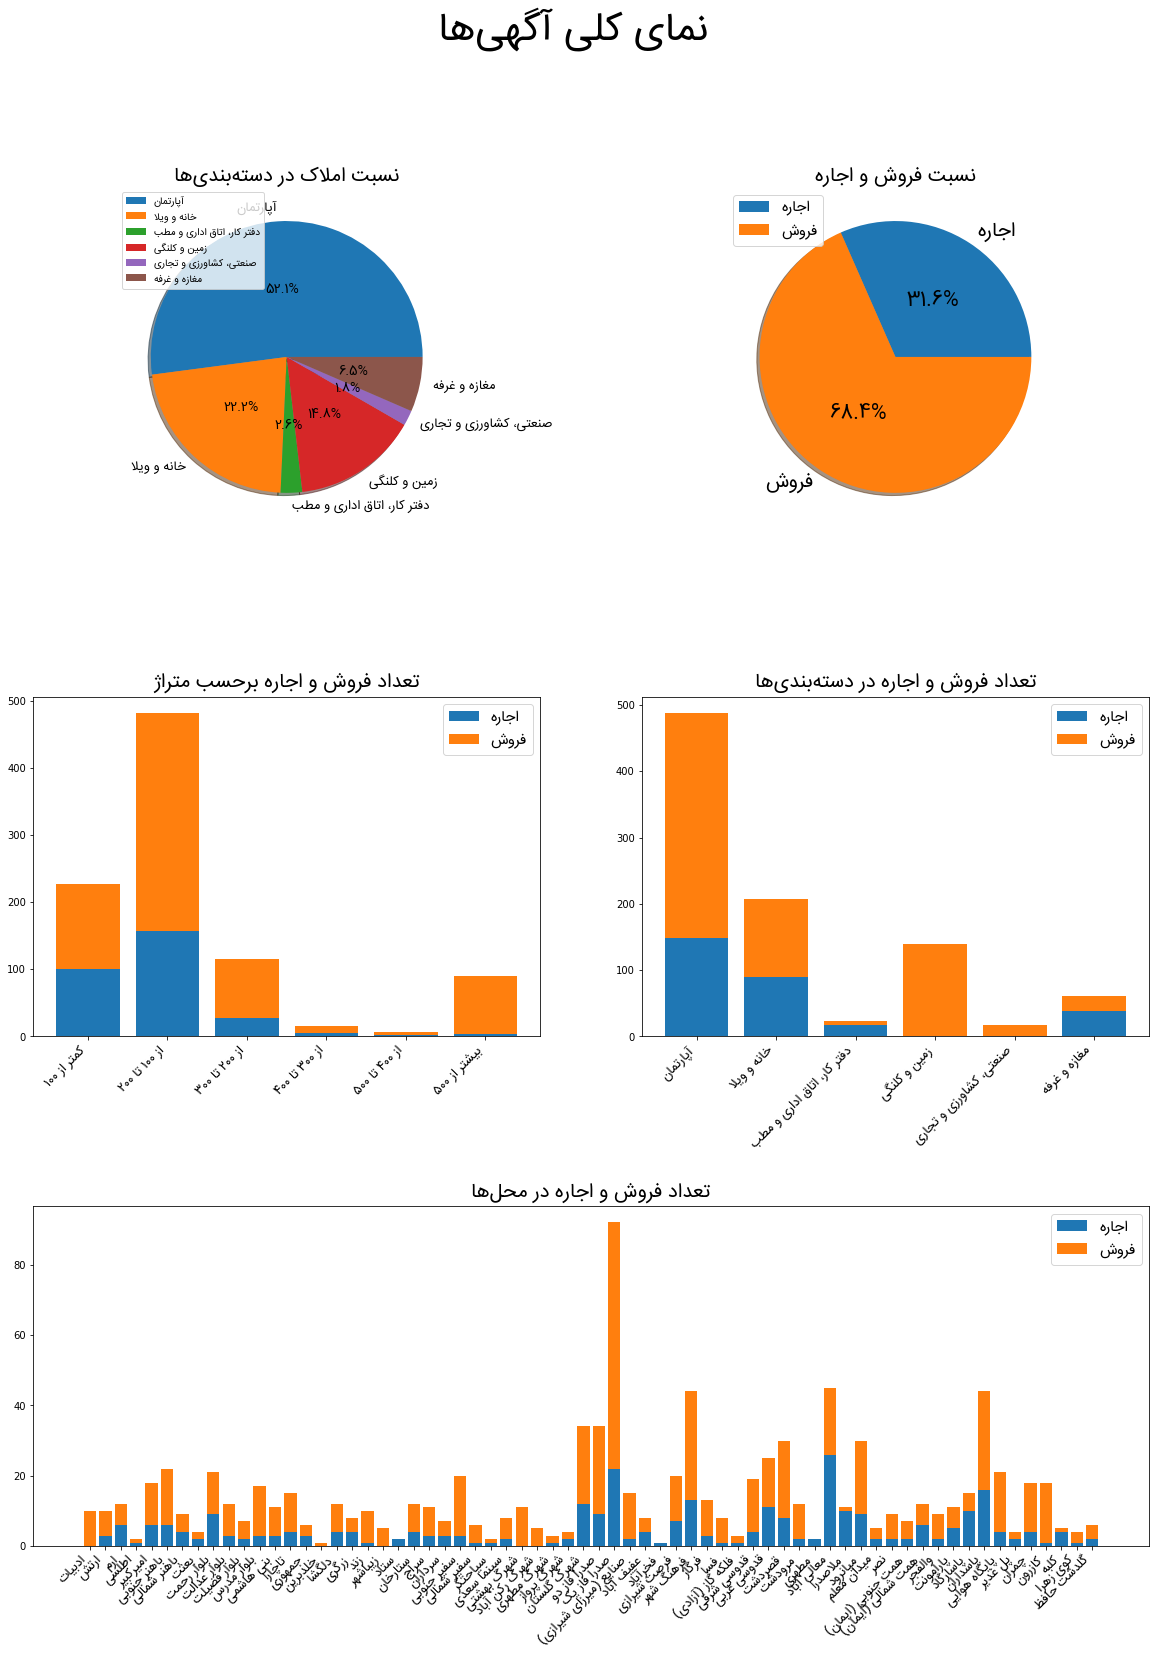

In [113]:
plt.figure(figsize=(20,25))
the_grid = GridSpec(nrows=3, ncols=2, hspace=0.50, wspace=0.2)

df_agg = df2[['ad_type', 'sub_category']].groupby(by=['ad_type']).count()
df_agg = df_agg.reset_index()
df_agg['ad_type'] = df_agg['ad_type'].apply(lambda x: PersianText.reshape(x))
df_agg.columns = [PersianText.reshape(c) for c in list(df_agg.columns)]
df_agg = df_agg.fillna(0)
plt.subplot(the_grid[0, 1])
plt.pie(x=df_agg['sub_category'], autopct='%1.1f%%', pctdistance=0.5,
        shadow=True, textprops={'fontproperties':get_font_properties(20)}, labels=df_agg['ad_type'])
plt.title(PersianText.reshape('نسبت فروش و اجاره'), fontproperties=get_font_properties(20))
plt.legend(list(df_agg['ad_type']), prop=get_font_properties(15))

df_agg = df2[['ad_type', 'sub_category']].groupby(by=['sub_category']).count()
df_agg = df_agg.reset_index()
df_agg['sub_category'] = df_agg['sub_category'].apply(lambda x: PersianText.reshape(x))
df_agg.columns = [PersianText.reshape(c) for c in list(df_agg.columns)]
df_agg = df_agg.fillna(0)
plt.subplot(the_grid[0, 0])
plt.pie(x=df_agg['ad_type'], autopct='%1.1f%%', pctdistance=0.5,
        shadow=True, textprops={'fontproperties':get_font_properties(13)}, labels=df_agg['sub_category'])
plt.title(PersianText.reshape('نسبت املاک در دسته‌بندی‌ها'), fontproperties=get_font_properties(20))
plt.legend(list(df_agg['sub_category']), prop=get_font_properties(10), loc='upper left')

stacked_bar(stacked_group='ad_type', x='sub_category', data=df2, title='تعداد فروش و اجاره در دسته‌بندی‌ها', grid_cell=the_grid[1, 1])
stacked_bar(stacked_group='ad_type', x='area_cat', data=df2, title='تعداد فروش و اجاره برحسب متراژ', grid_cell=the_grid[1, 0])
stacked_bar(stacked_group='ad_type', x='location', data=df2, title='تعداد فروش و اجاره در محل‌ها', grid_cell=the_grid[2, 0:])

plt.suptitle(PersianText.reshape('نمای کلی آگهی‌ها'), fontproperties=get_font_properties(40))
plt.show()

# آپارتمانهای فروشی

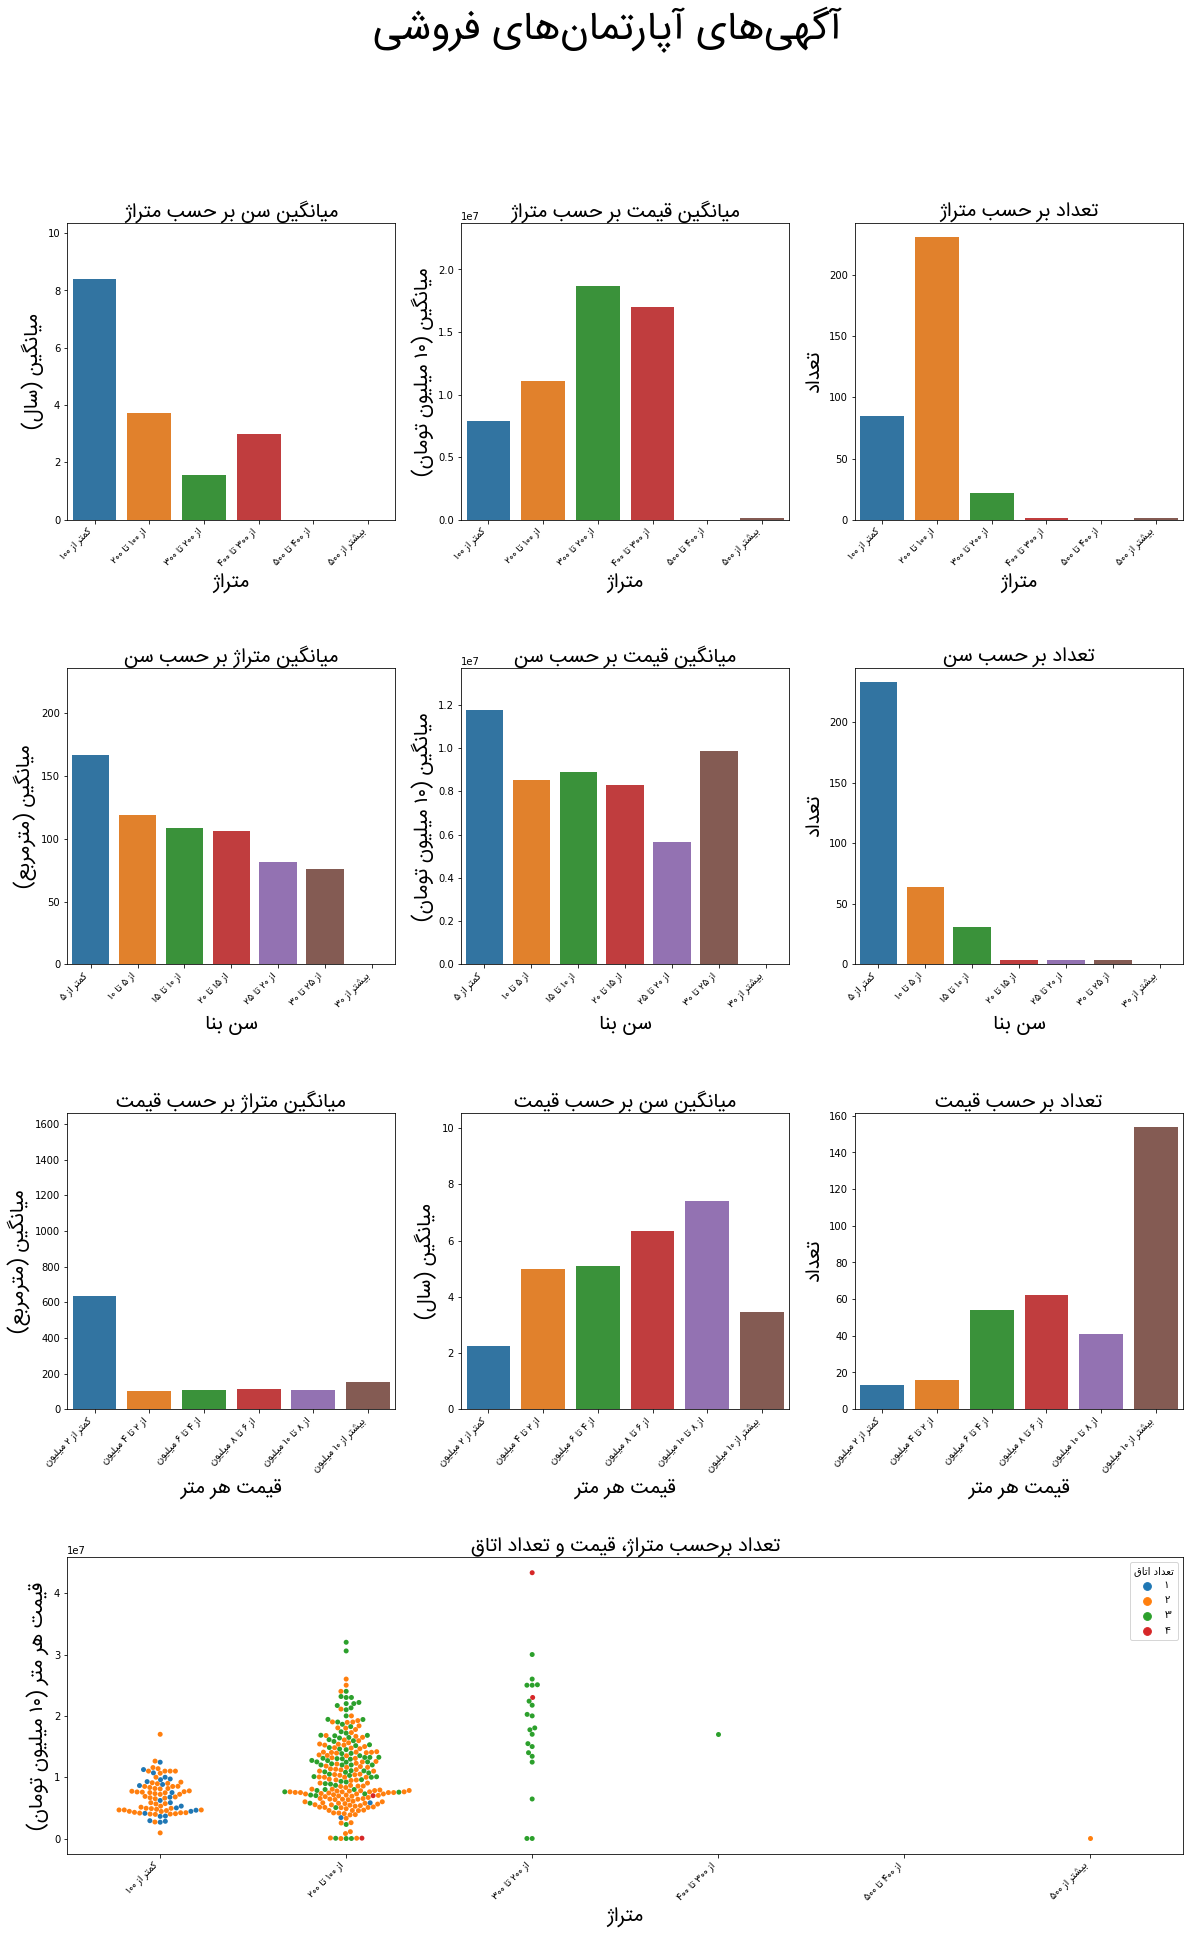

In [114]:
plt.figure(figsize=(20,30))
the_grid = GridSpec(nrows=4, ncols=3, hspace=0.50, wspace=0.20)

count_bar(values=df_sell_apartment['area_cat'], grid_cell=the_grid[0, 2],
          title='تعداد بر حسب متراژ', xlabel='متراژ', ylabel='تعداد')
mean_bar(x='area_cat', y='sell_unit_price', data=df_sell_apartment, grid_cell=the_grid[0, 1],
         title='میانگین قیمت بر حسب متراژ', xlabel='متراژ', ylabel='میانگین (۱۰ میلیون تومان)')
mean_bar(x='area_cat', y='age', data=df_sell_apartment, grid_cell=the_grid[0, 0],
         title='میانگین سن بر حسب متراژ', xlabel='متراژ', ylabel='میانگین (سال)')

count_bar(values=df_sell_apartment['age_cat'], grid_cell=the_grid[1, 2],
          title='تعداد بر حسب سن', xlabel='سن بنا', ylabel='تعداد')
mean_bar(x='age_cat', y='sell_unit_price', data=df_sell_apartment, grid_cell=the_grid[1, 1],
         title='میانگین قیمت بر حسب سن', xlabel='سن بنا', ylabel='میانگین (۱۰ میلیون تومان)')
mean_bar(x='age_cat', y='area', data=df_sell_apartment, grid_cell=the_grid[1, 0],
         title='میانگین متراژ بر حسب سن', xlabel='سن بنا', ylabel='میانگین (مترمربع)')

count_bar(values=df_sell_apartment['sell_unit_price_cat'], grid_cell=the_grid[2, 2],
          title='تعداد بر حسب قیمت', xlabel='قیمت هر متر', ylabel='تعداد')
mean_bar(x='sell_unit_price_cat', y='age', data=df_sell_apartment, grid_cell=the_grid[2, 1],
         title='میانگین سن بر حسب قیمت', xlabel='قیمت هر متر', ylabel='میانگین (سال)')
mean_bar(x='sell_unit_price_cat', y='area', data=df_sell_apartment, grid_cell=the_grid[2, 0],
         title='میانگین متراژ بر حسب قیمت', xlabel='قیمت هر متر', ylabel='میانگین (مترمربع)')

df_temp = df_sell_apartment[df_sell_apartment['sell_unit_price'] <= 5e7]
swarm(x='area_cat', y='sell_unit_price', hue='rooms', data=df_temp, grid_cell=the_grid[3, 0:],
      title='تعداد برحسب متراژ، قیمت و تعداد اتاق', xlabel='متراژ', ylabel='قیمت هر متر (۱۰ میلیون تومان)',
      legend_title='تعداد اتاق')

plt.suptitle(PersianText.reshape('آگهی‌های آپارتمان‌های فروشی'), fontproperties=get_font_properties(40))
plt.show()

# آپارتمانهای اجاره‌ای

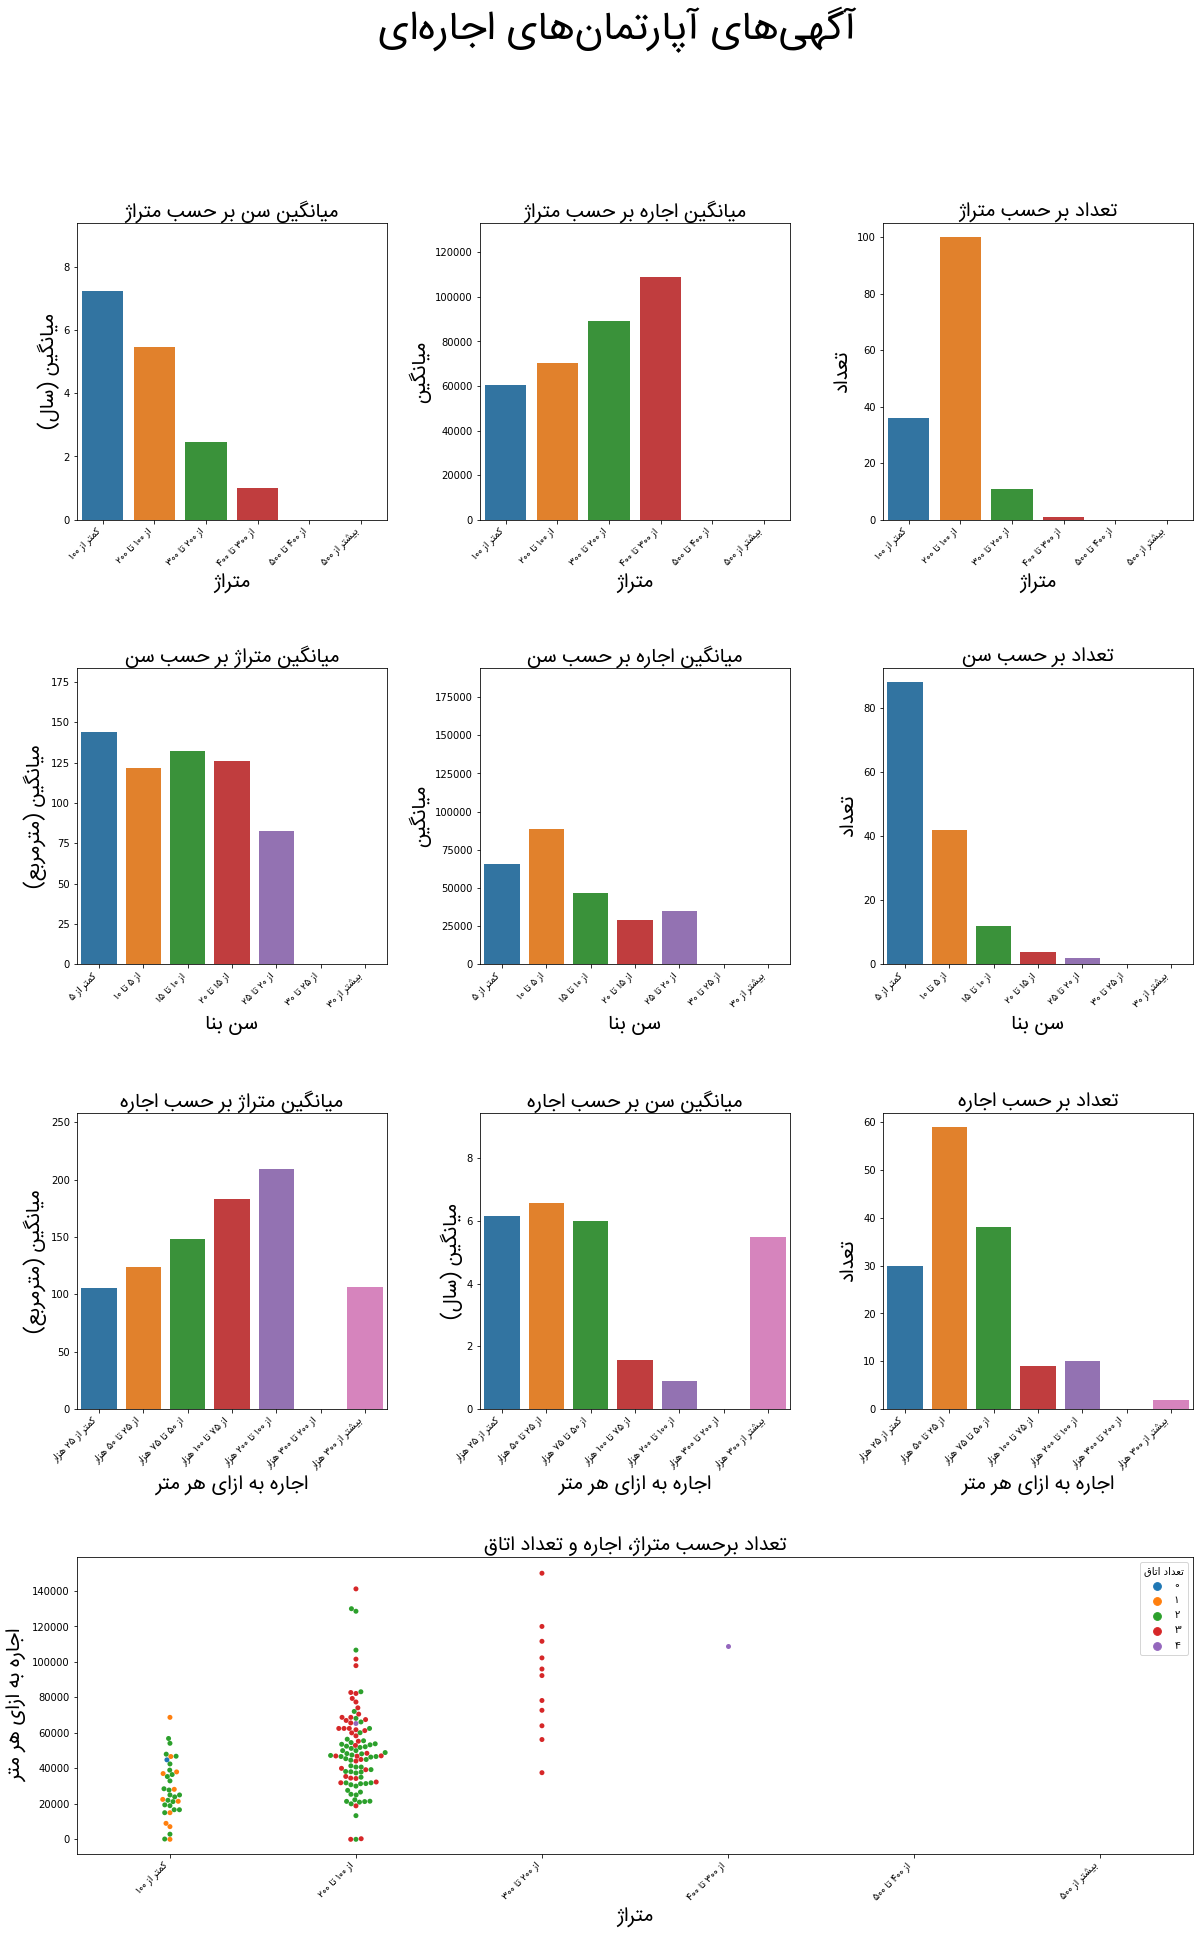

In [115]:
plt.figure(figsize=(20,30))
the_grid = GridSpec(nrows=4, ncols=3, hspace=0.50, wspace=0.3)

count_bar(values=df_rent_apartment['area_cat'], grid_cell=the_grid[0, 2],
          title='تعداد بر حسب متراژ', xlabel='متراژ', ylabel='تعداد')
mean_bar(x='area_cat', y='rent_unit_price', data=df_rent_apartment, grid_cell=the_grid[0, 1],
         title='میانگین اجاره بر حسب متراژ', xlabel='متراژ', ylabel='میانگین')
mean_bar(x='area_cat', y='age', data=df_rent_apartment, grid_cell=the_grid[0, 0],
         title='میانگین سن بر حسب متراژ', xlabel='متراژ', ylabel='میانگین (سال)')

count_bar(values=df_rent_apartment['age_cat'], grid_cell=the_grid[1, 2],
          title='تعداد بر حسب سن', xlabel='سن بنا', ylabel='تعداد')
mean_bar(x='age_cat', y='rent_unit_price', data=df_rent_apartment, grid_cell=the_grid[1, 1],
         title='میانگین اجاره بر حسب سن', xlabel='سن بنا', ylabel='میانگین')
mean_bar(x='age_cat', y='area', data=df_rent_apartment, grid_cell=the_grid[1, 0],
         title='میانگین متراژ بر حسب سن', xlabel='سن بنا', ylabel='میانگین (مترمربع)')

count_bar(values=df_rent_apartment['rent_unit_price_cat'], grid_cell=the_grid[2, 2],
          title='تعداد بر حسب اجاره', xlabel='اجاره به ازای هر متر', ylabel='تعداد')
mean_bar(x='rent_unit_price_cat', y='age', data=df_rent_apartment, grid_cell=the_grid[2, 1],
         title='میانگین سن بر حسب اجاره', xlabel='اجاره به ازای هر متر', ylabel='میانگین (سال)')
mean_bar(x='rent_unit_price_cat', y='area', data=df_rent_apartment, grid_cell=the_grid[2, 0],
         title='میانگین متراژ بر حسب اجاره', xlabel='اجاره به ازای هر متر', ylabel='میانگین (مترمربع)')

df_temp = df_rent_apartment[df_rent_apartment['rent_unit_price'] <= 500000]
swarm(x='area_cat', y='rent_unit_price', hue='rooms', data=df_temp, grid_cell=the_grid[3, 0:],
      title='تعداد برحسب متراژ، اجاره و تعداد اتاق', xlabel='متراژ', ylabel='اجاره به ازای هر متر',
      legend_title='تعداد اتاق')

plt.suptitle(PersianText.reshape('آگهی‌های آپارتمان‌های اجاره‌ای'), fontproperties=get_font_properties(40))
plt.show()

# خانه‌های فروشی

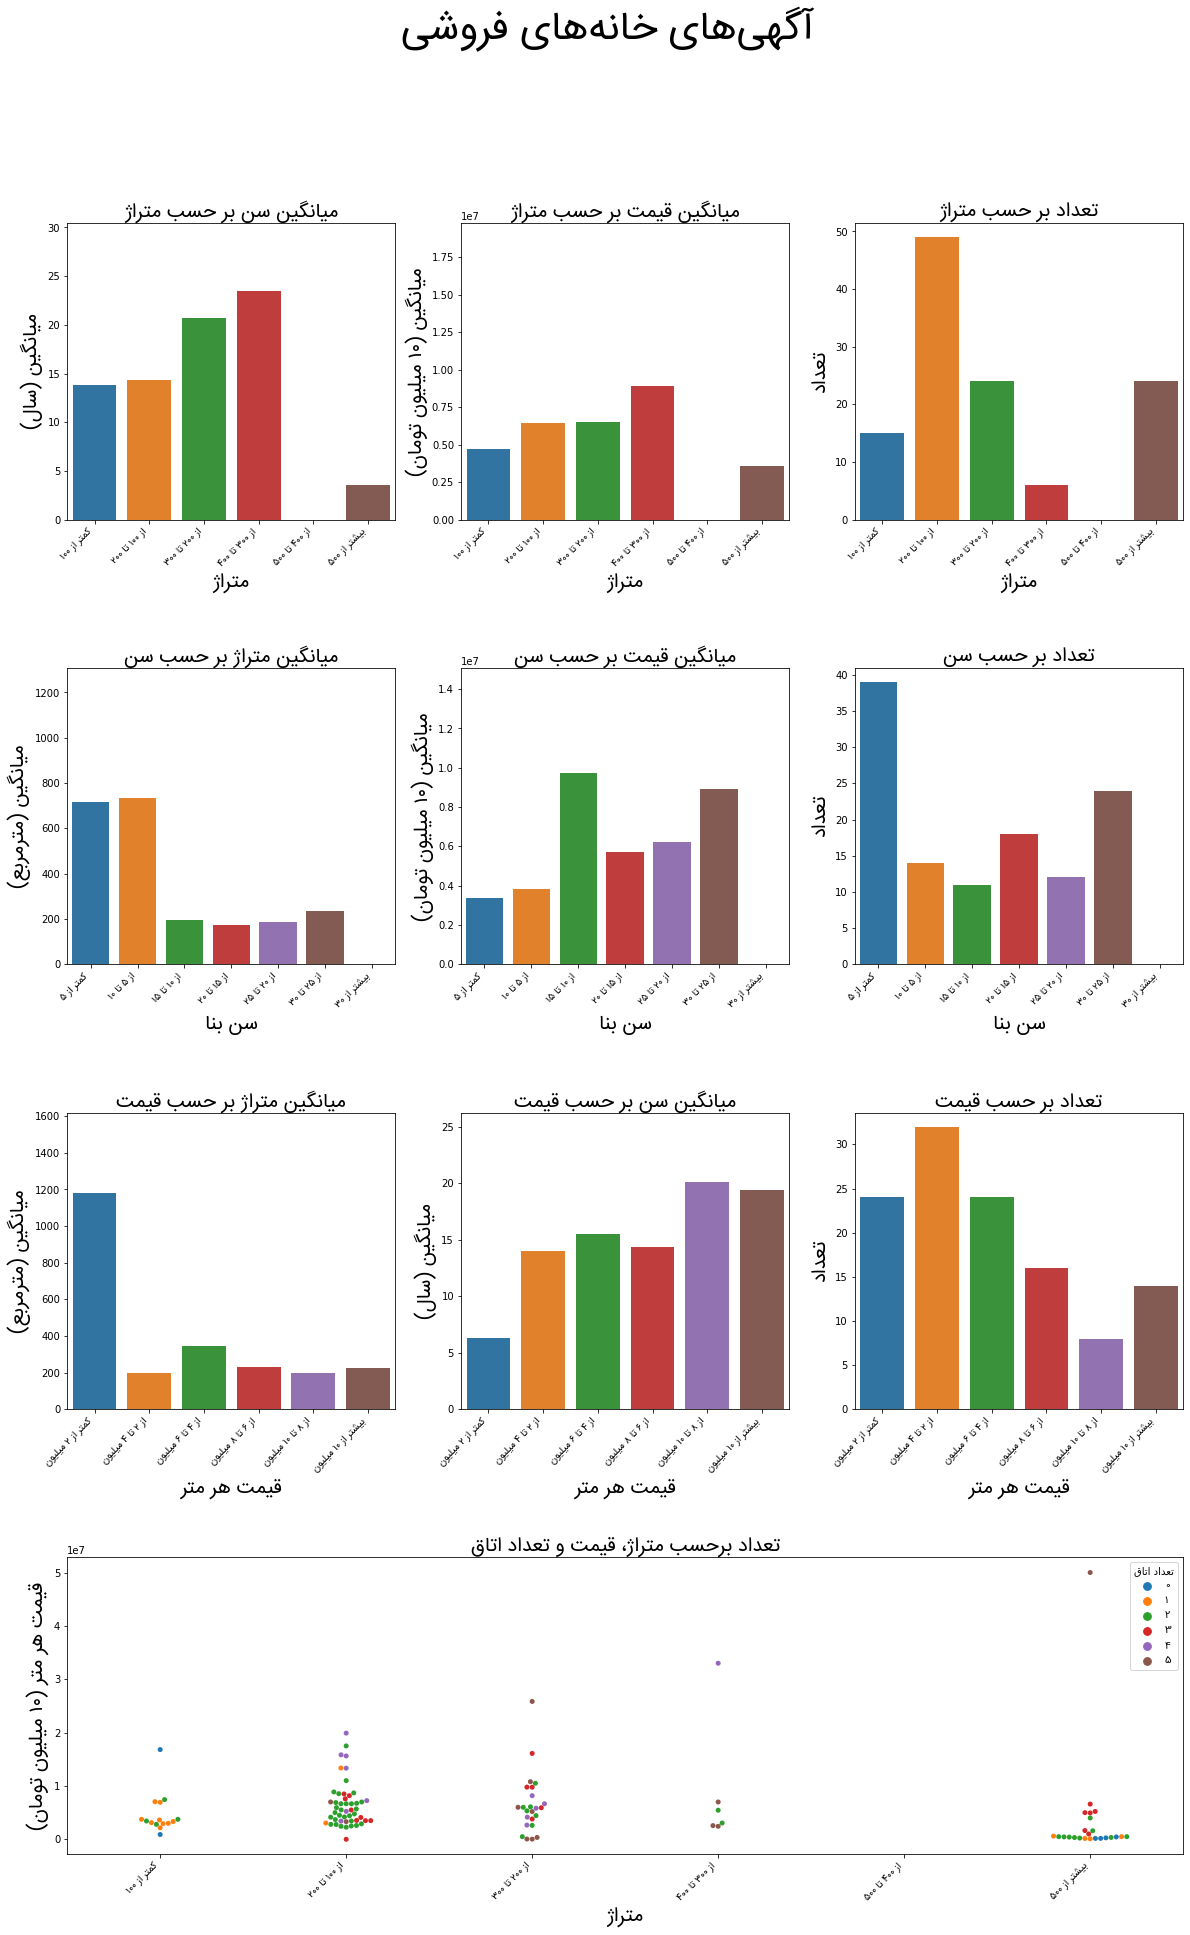

In [116]:
plt.figure(figsize=(20,30))
the_grid = GridSpec(nrows=4, ncols=3, hspace=0.50, wspace=0.20)

count_bar(values=df_sell_house['area_cat'], grid_cell=the_grid[0, 2],
          title='تعداد بر حسب متراژ', xlabel='متراژ', ylabel='تعداد')
mean_bar(x='area_cat', y='sell_unit_price', data=df_sell_house, grid_cell=the_grid[0, 1],
         title='میانگین قیمت بر حسب متراژ', xlabel='متراژ', ylabel='میانگین (۱۰ میلیون تومان)')
mean_bar(x='area_cat', y='age', data=df_sell_house, grid_cell=the_grid[0, 0],
         title='میانگین سن بر حسب متراژ', xlabel='متراژ', ylabel='میانگین (سال)')

count_bar(values=df_sell_house['age_cat'], grid_cell=the_grid[1, 2],
          title='تعداد بر حسب سن', xlabel='سن بنا', ylabel='تعداد')
mean_bar(x='age_cat', y='sell_unit_price', data=df_sell_house, grid_cell=the_grid[1, 1],
         title='میانگین قیمت بر حسب سن', xlabel='سن بنا', ylabel='میانگین (۱۰ میلیون تومان)')
mean_bar(x='age_cat', y='area', data=df_sell_house, grid_cell=the_grid[1, 0],
         title='میانگین متراژ بر حسب سن', xlabel='سن بنا', ylabel='میانگین (مترمربع)')

count_bar(values=df_sell_house['sell_unit_price_cat'], grid_cell=the_grid[2, 2],
          title='تعداد بر حسب قیمت', xlabel='قیمت هر متر', ylabel='تعداد')
mean_bar(x='sell_unit_price_cat', y='age', data=df_sell_house, grid_cell=the_grid[2, 1],
         title='میانگین سن بر حسب قیمت', xlabel='قیمت هر متر', ylabel='میانگین (سال)')
mean_bar(x='sell_unit_price_cat', y='area', data=df_sell_house, grid_cell=the_grid[2, 0],
         title='میانگین متراژ بر حسب قیمت', xlabel='قیمت هر متر', ylabel='میانگین (مترمربع)')

df_temp = df_sell_house[df_sell_house['sell_unit_price'] <= 5e7]
swarm(x='area_cat', y='sell_unit_price', hue='rooms', data=df_temp, grid_cell=the_grid[3, 0:],
      title='تعداد برحسب متراژ، قیمت و تعداد اتاق', xlabel='متراژ', ylabel='قیمت هر متر (۱۰ میلیون تومان)',
      legend_title='تعداد اتاق')

plt.suptitle(PersianText.reshape('آگهی‌های خانه‌های فروشی'), fontproperties=get_font_properties(40))
plt.show()

# خانه‌های اجاره‌ای

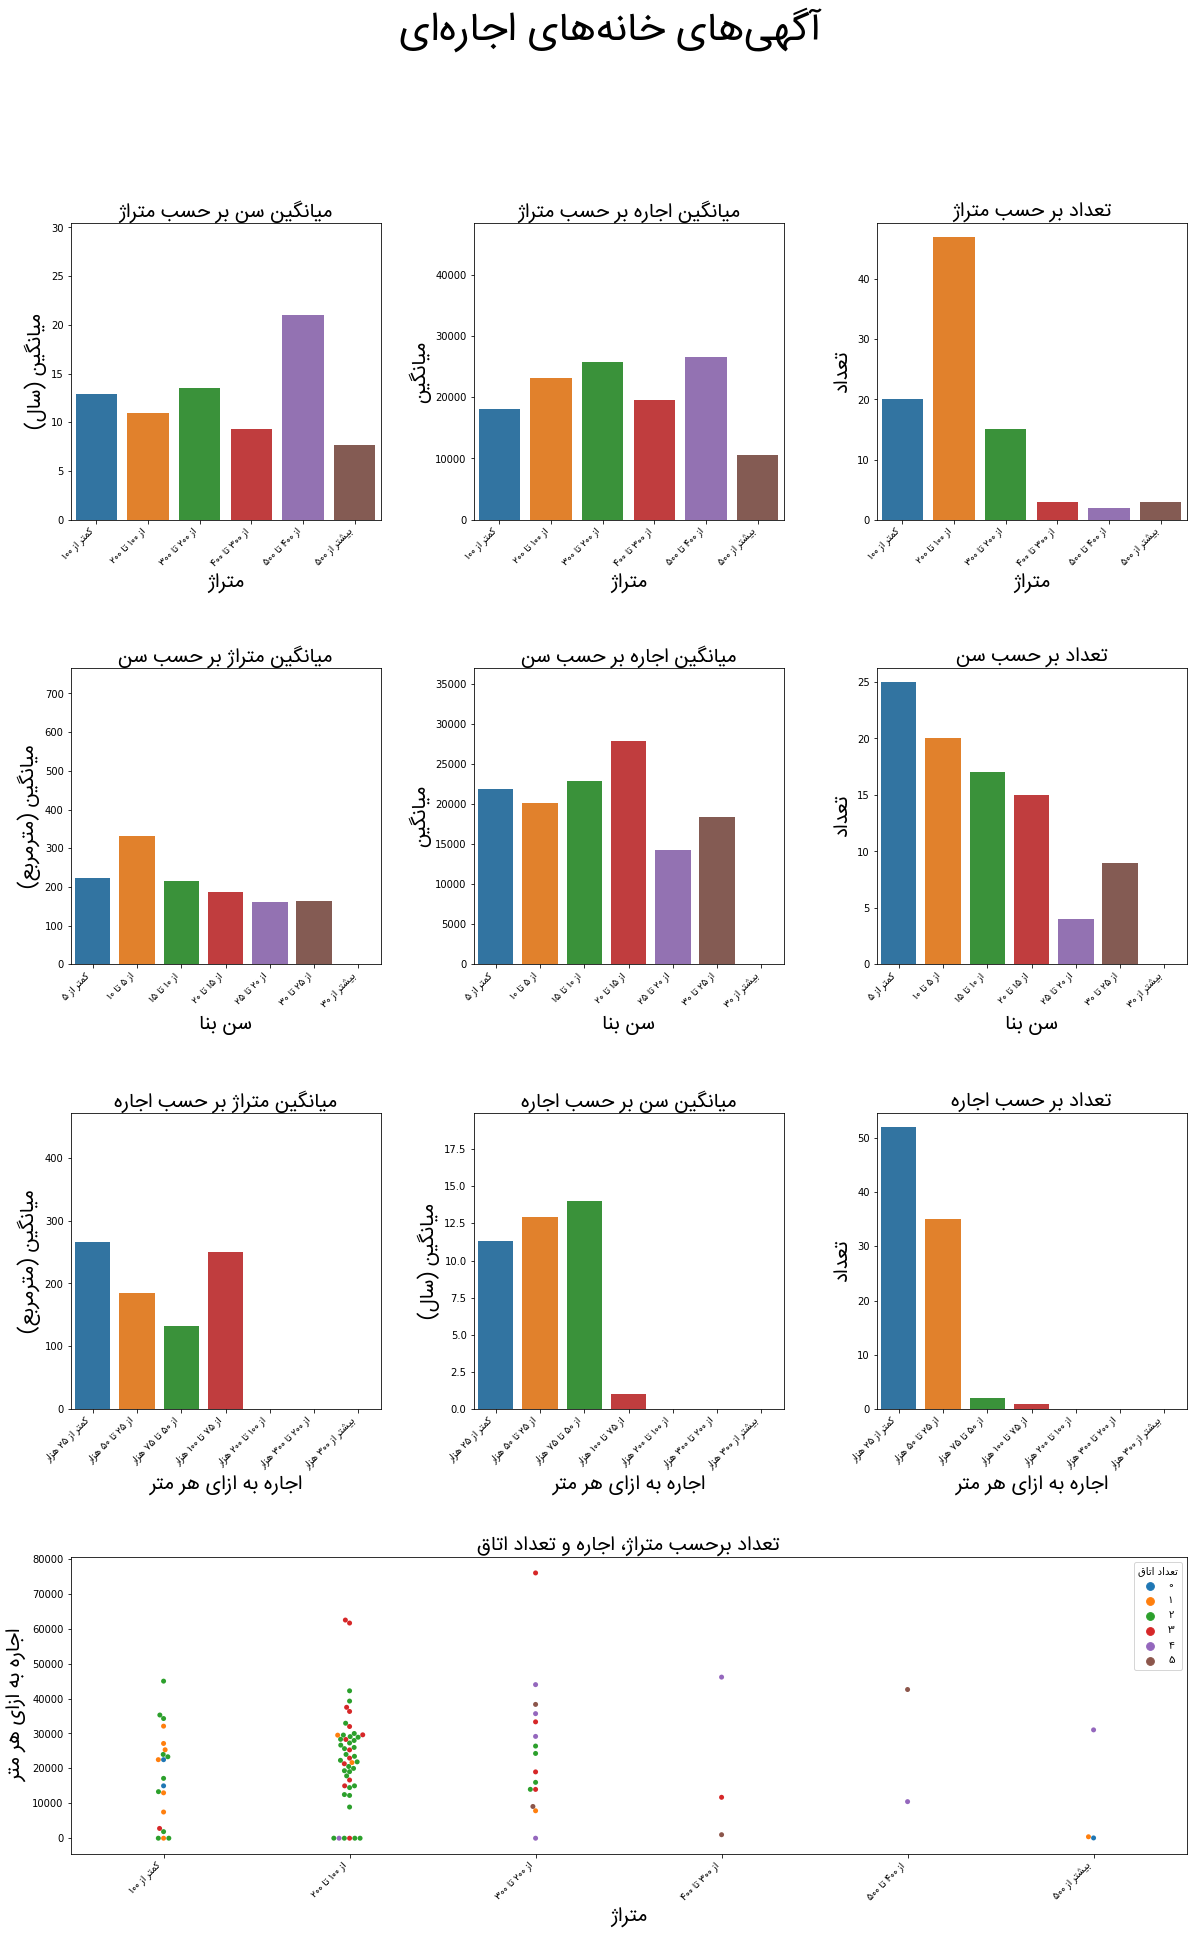

In [117]:
plt.figure(figsize=(20,30))
the_grid = GridSpec(nrows=4, ncols=3, hspace=0.50, wspace=0.3)

count_bar(values=df_rent_house['area_cat'], grid_cell=the_grid[0, 2],
          title='تعداد بر حسب متراژ', xlabel='متراژ', ylabel='تعداد')
mean_bar(x='area_cat', y='rent_unit_price', data=df_rent_house, grid_cell=the_grid[0, 1],
         title='میانگین اجاره بر حسب متراژ', xlabel='متراژ', ylabel='میانگین')
mean_bar(x='area_cat', y='age', data=df_rent_house, grid_cell=the_grid[0, 0],
         title='میانگین سن بر حسب متراژ', xlabel='متراژ', ylabel='میانگین (سال)')

count_bar(values=df_rent_house['age_cat'], grid_cell=the_grid[1, 2],
          title='تعداد بر حسب سن', xlabel='سن بنا', ylabel='تعداد')
mean_bar(x='age_cat', y='rent_unit_price', data=df_rent_house, grid_cell=the_grid[1, 1],
         title='میانگین اجاره بر حسب سن', xlabel='سن بنا', ylabel='میانگین')
mean_bar(x='age_cat', y='area', data=df_rent_house, grid_cell=the_grid[1, 0],
         title='میانگین متراژ بر حسب سن', xlabel='سن بنا', ylabel='میانگین (مترمربع)')

count_bar(values=df_rent_house['rent_unit_price_cat'], grid_cell=the_grid[2, 2],
          title='تعداد بر حسب اجاره', xlabel='اجاره به ازای هر متر', ylabel='تعداد')
mean_bar(x='rent_unit_price_cat', y='age', data=df_rent_house, grid_cell=the_grid[2, 1],
         title='میانگین سن بر حسب اجاره', xlabel='اجاره به ازای هر متر', ylabel='میانگین (سال)')
mean_bar(x='rent_unit_price_cat', y='area', data=df_rent_house, grid_cell=the_grid[2, 0],
         title='میانگین متراژ بر حسب اجاره', xlabel='اجاره به ازای هر متر', ylabel='میانگین (مترمربع)')

df_temp = df_rent_house[df_rent_house['rent_unit_price'] <= 500000]
swarm(x='area_cat', y='rent_unit_price', hue='rooms', data=df_temp, grid_cell=the_grid[3, 0:],
      title='تعداد برحسب متراژ، اجاره و تعداد اتاق', xlabel='متراژ', ylabel='اجاره به ازای هر متر',
      legend_title='تعداد اتاق')

plt.suptitle(PersianText.reshape('آگهی‌های خانه‌های اجاره‌ای'), fontproperties=get_font_properties(40))
plt.show()

In [8]:
COL_NAMES = ['ad_type', 'sub_category', 'location']
gr = df.groupby(by=COL_NAMES).agg(['count', 'mean'])
# gr = df.groupby(by=COL_NAMES).count()[['post_id']]
# gr = gr.reset_index()
# gr.columns = [COL_NAME, 'count']
# gr.sort_values(by=['count'], ascending=False)
gr.unstack().unstack().T.reset_index()
# gr

ad_type,level_0,level_1,location,sub_category,اجاره,فروشی
0,build_year,count,آبشار,آپارتمان,1.000000,1.000000
1,build_year,count,آبشار,خانه و ویلا,NaN,1.000000
2,build_year,count,آبشار,دفتر کار، اتاق اداری و مطب,NaN,NaN
3,build_year,count,آبشار,صنعتی، کشاورزی و تجاری,0.000000,1.000000
4,build_year,count,آبشار,مغازه و غرفه,NaN,NaN
...,...,...,...,...,...,...
7411,age,mean,یوسف‌آباد,خانه و ویلا,NaN,1.000000
7412,age,mean,یوسف‌آباد,دفتر کار، اتاق اداری و مطب,15.333333,14.666667
7413,age,mean,یوسف‌آباد,صنعتی، کشاورزی و تجاری,NaN,NaN
7414,age,mean,یوسف‌آباد,مغازه و غرفه,19.000000,NaN


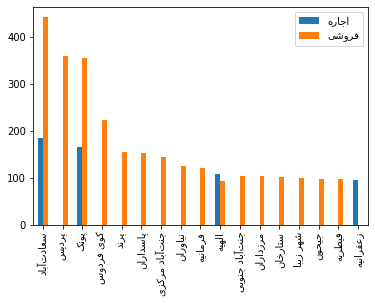

In [100]:
SUB_CAT = 'آپارتمان'
aggregate = df2[df2['sub_category'] == SUB_CAT].groupby(by=['location', 'ad_type']).count()['age'].nlargest(20)
aggregate = aggregate.unstack()
aggregate.index = [PersianText.reshape(s) for s in list(aggregate.index)]
aggregate.columns = [PersianText.reshape(s) for s in list(aggregate.columns)]
aggregate.plot(kind='bar')
plt.show()


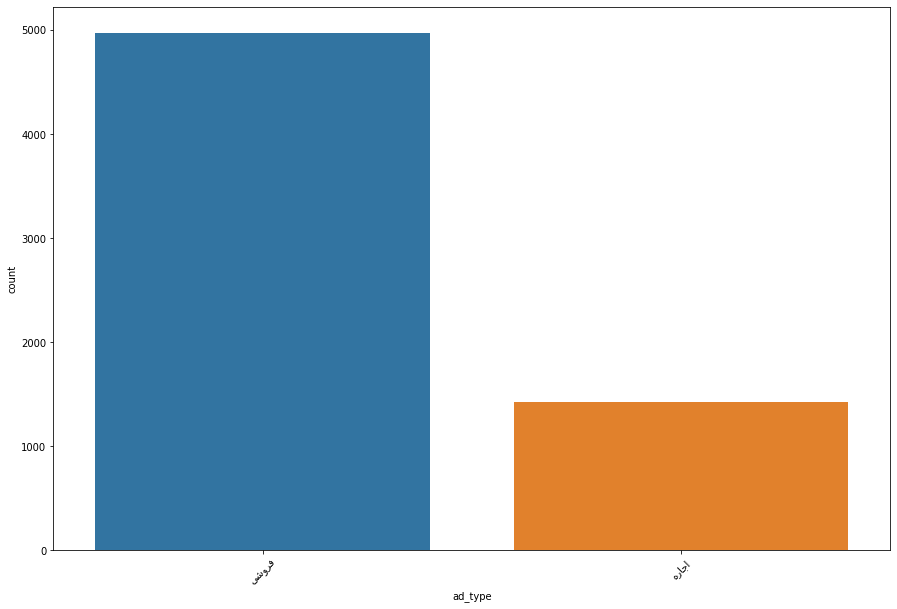

In [30]:
plt.subplots(figsize=(15, 10))
ax = sns.countplot(x='ad_type', data=df2)
plt.xticks(rotation=45)
reshape_axes_labels(ax)
plt.show()

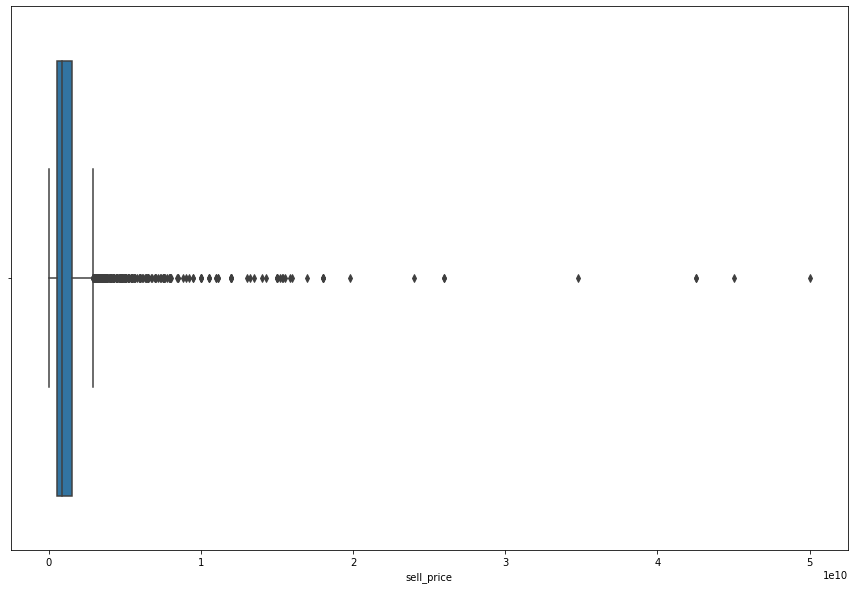

In [20]:
plt.subplots(figsize=(15, 10))
ax = sns.boxplot('sell_price', data=df_sell)
# plt.xticks(rotation=45)
# reshape_axes_labels(ax)
plt.show()

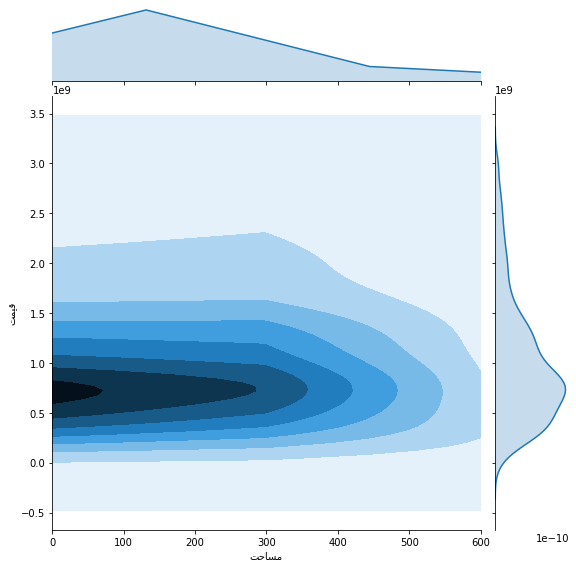

In [60]:
df_temp = df_sell[df_sell['sell_price'] <= 3000000000]

# xlabel = PersianText.reshape('تعداد اتاق')
# ylabel = PersianText.reshape('مساحت')
# sns.jointplot(x='rooms', y='area', data=df_temp, ylim=(0, 600), kind='kde', height=8) \
#     .set_axis_labels(xlabel, ylabel)

xlabel = PersianText.reshape('مساحت')
ylabel = PersianText.reshape('قیمت')
sns.jointplot(x='area', y='sell_price', data=df_temp, xlim=(0, 600), kind='kde', height=8) \
    .set_axis_labels(xlabel, ylabel)

plt.show()
# plt.savefig('isrs-05.png')

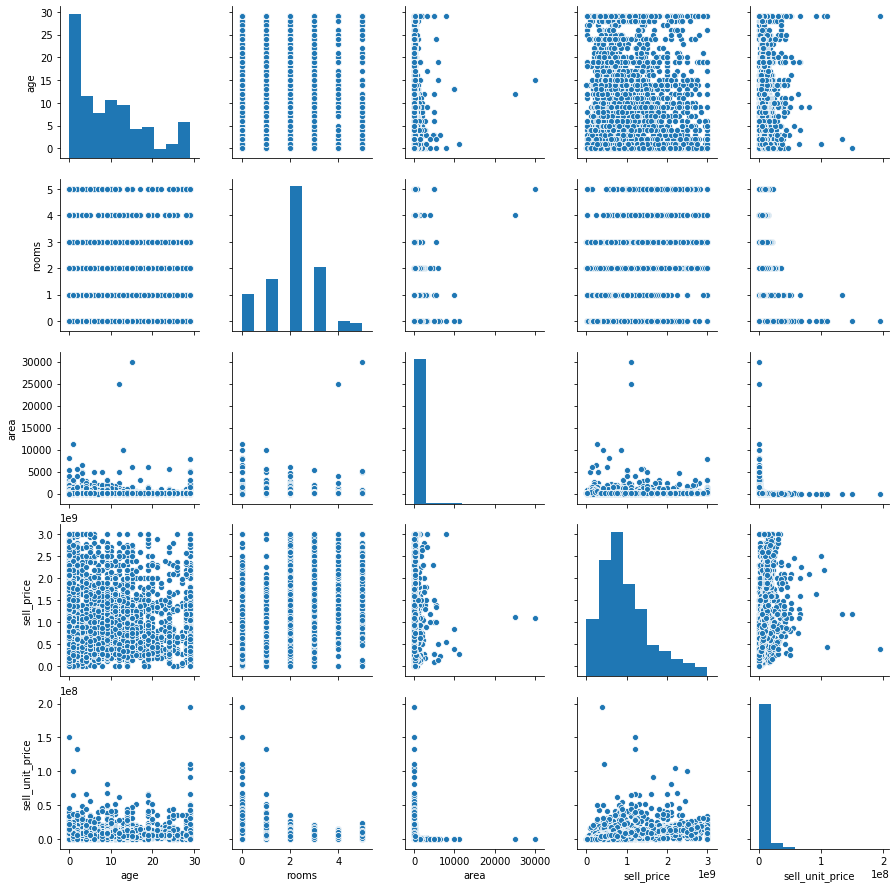

In [40]:
df_temp = df_sell[df_sell['sell_price'] <= 3000000000]
sns.pairplot(data=df_temp, kind='scatter') # x_vars=['area'], y_vars=['age', 'rooms'])
plt.show()

In [41]:
sns.set(style='whitegrid', color_codes=True)
np.random.seed(sum(map(ord, 'categorical')))

# Note: below code is very time consuming

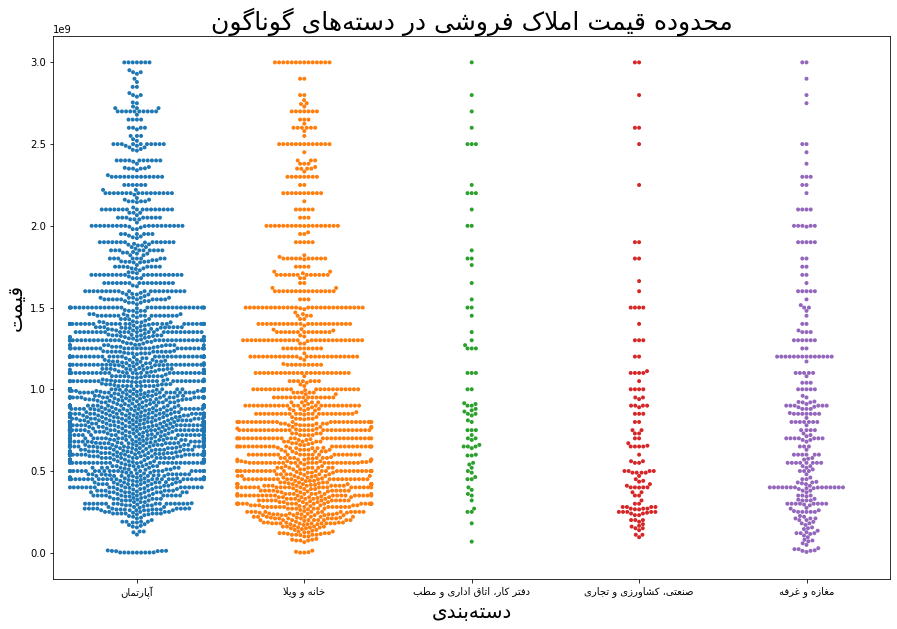

In [67]:
df_temp = df_sell[df_sell['sell_price'] <= 3000000000]
plt.subplots(figsize=(15, 10))
# ax = sns.stripplot(x='sub_category', y='sell_price', data=df_temp, size=4, jitter=True)
# ax = sns.stripplot(x='sub_category', y='area', data=df_sell, size=4, jitter=True)
ax = sns.swarmplot(x='sub_category', y='sell_price', data=df_temp, size=4)
ax.set_title(PersianText.reshape('محدوده قیمت املاک فروشی در دسته‌های گوناگون'), fontsize=25)
ax.set_xlabel(PersianText.reshape('دسته‌بندی'), fontsize=20)
ax.set_ylabel(PersianText.reshape('قیمت'), fontsize=20)
reshape_axes_labels(ax)
plt.show()
# plt.savefig('isrs-06.png')


# Note: below code is very time consuming

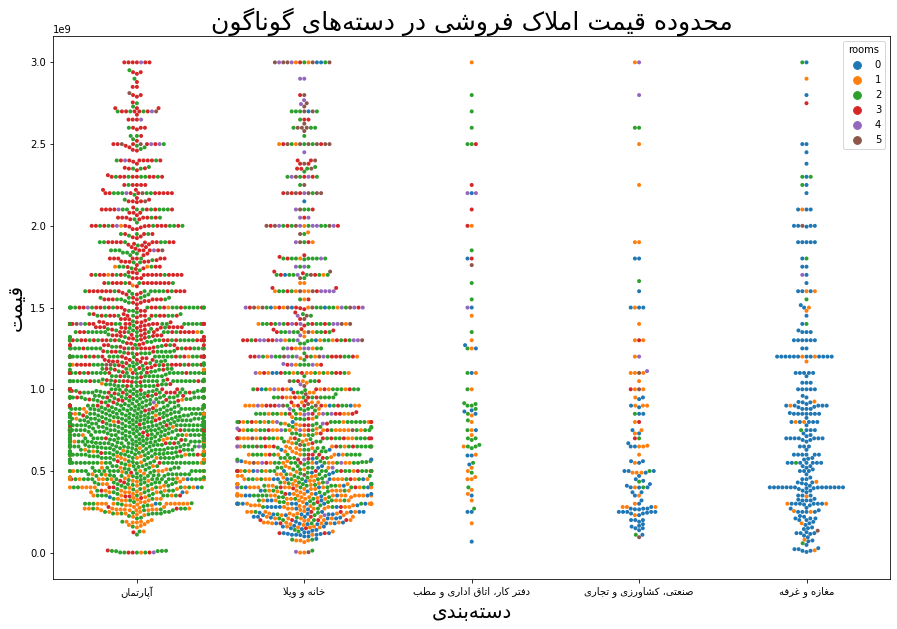

In [69]:
df_temp = df_sell[df_sell['sell_price'] <= 3000000000]
plt.subplots(figsize=(15, 10))
ax = sns.swarmplot(x='sub_category', y='sell_price', data=df_temp, size=4, hue='rooms')
ax.set_title(PersianText.reshape('محدوده قیمت املاک فروشی در دسته‌های گوناگون'), fontsize=25)
ax.set_xlabel(PersianText.reshape('دسته‌بندی'), fontsize=20)
ax.set_ylabel(PersianText.reshape('قیمت'), fontsize=20)
reshape_axes_labels(ax)
plt.show()
# plt.savefig('isrs-07.png')

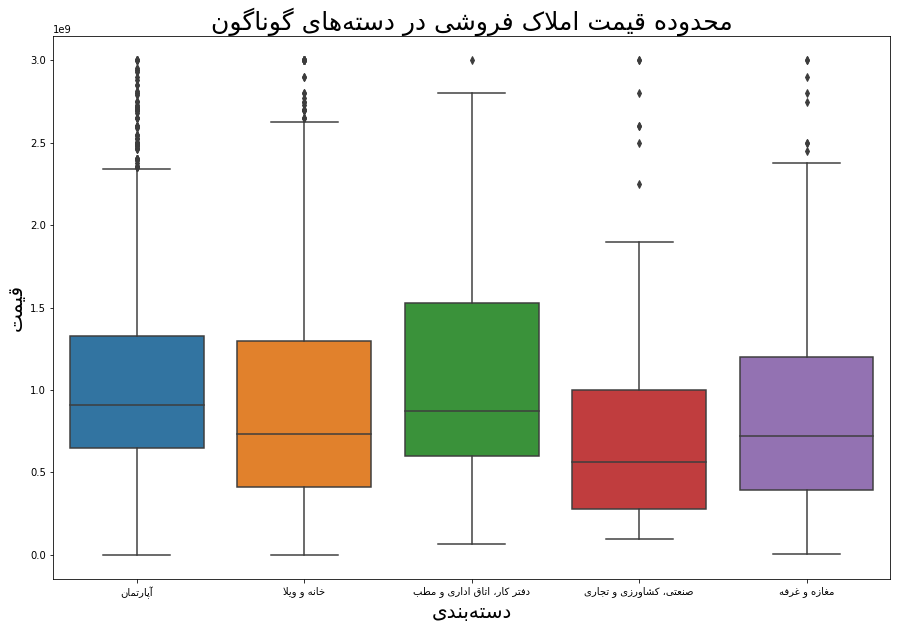

In [70]:
plt.subplots(figsize=(15, 10))
# ax = sns.boxplot(x='sub_category', y='rooms', data=df_sell)
# ax = sns.boxplot(x='sub_category', y='age', data=df_sell)

# df_temp = df_sell[df_sell['area'] <= 1000]
# ax = sns.boxplot(x='sub_category', y='area', data=df_temp)

df_temp = df_sell[df_sell['sell_price'] <= 3000000000]
ax = sns.boxplot(x='sub_category', y='sell_price', data=df_temp)
ax.set_title(PersianText.reshape('محدوده قیمت املاک فروشی در دسته‌های گوناگون'), fontsize=25)
ax.set_xlabel(PersianText.reshape('دسته‌بندی'), fontsize=20)
ax.set_ylabel(PersianText.reshape('قیمت'), fontsize=20)
reshape_axes_labels(ax)
# plt.show()
plt.savefig('isrs-08.png')

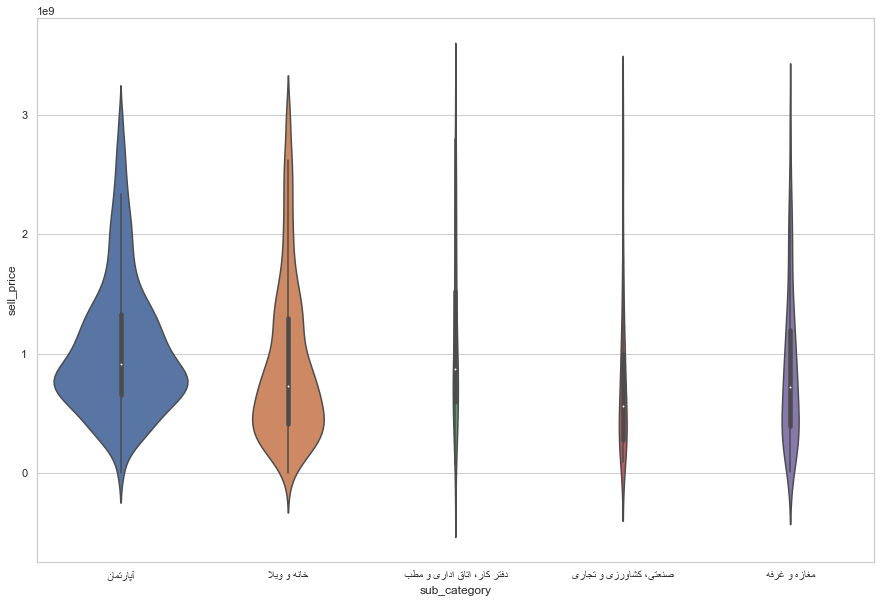

In [59]:
df_temp = df_sell[df_sell['sell_price'] <= 3e9].copy()
df_temp['sell_price'] = df_temp['sell_price'].astype('float')
plt.subplots(figsize=(15, 10))
# ax = sns.violinplot(x='sub_category', y='sell_price', data=df_temp)
ax = sns.violinplot(x='sub_category', y='sell_price', data=df_temp, scale='count')
reshape_axes_labels(ax)
plt.show()

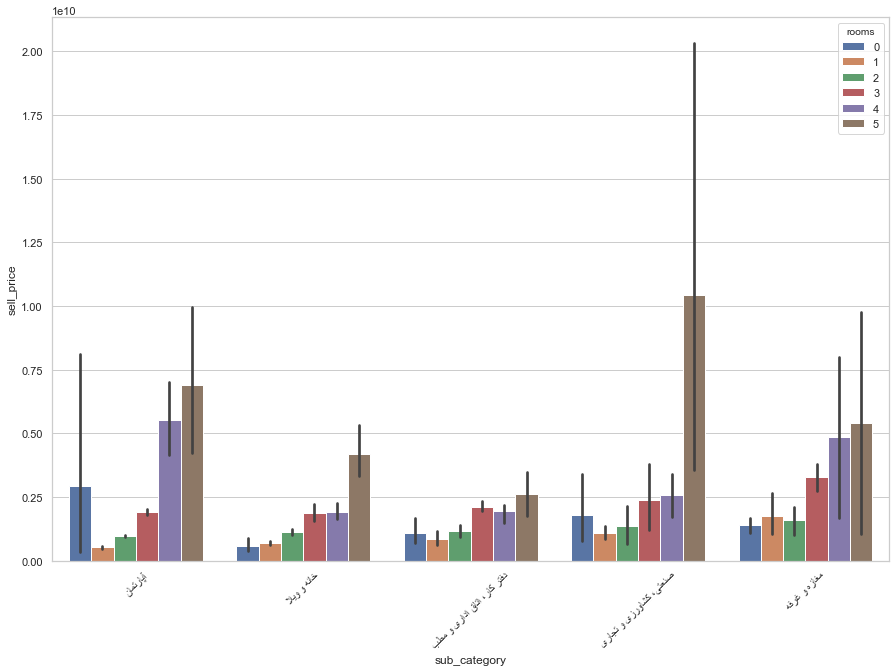

In [61]:
plt.subplots(figsize=(15, 10))
# ax = sns.barplot(x='sub_category', y='age', data=df_sell, hue='rooms')
ax = sns.barplot(x='sub_category', y='sell_price', data=df_sell, hue='rooms')
plt.xticks(rotation=45)
reshape_axes_labels(ax)
plt.show()

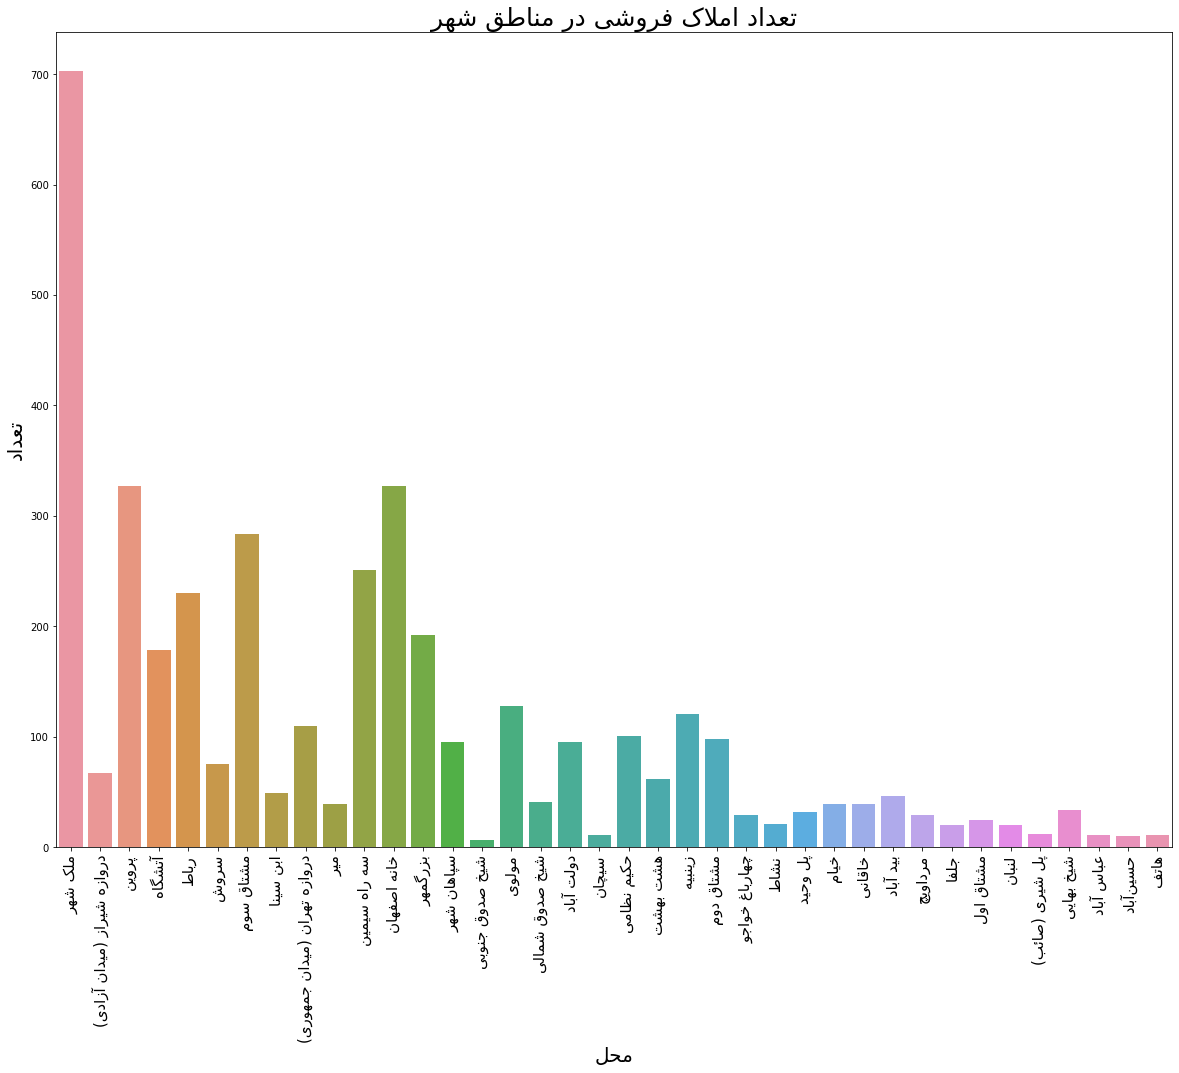

In [78]:
plt.subplots(figsize=(20, 15))
# ax = sns.countplot(x='rooms', data=df_sell)
ax = sns.countplot(x='location', data=df_sell)
ax.set_title(PersianText.reshape('تعداد املاک فروشی در مناطق شهر'), fontsize=25)
ax.set_xlabel(PersianText.reshape('محل'), fontsize=20)
ax.set_ylabel(PersianText.reshape('تعداد'), fontsize=20)
reshape_axes_labels(ax)
plt.xticks(rotation=90, fontsize=15)
plt.show()
# plt.savefig('isrs-09.png')

/home/rasoul/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


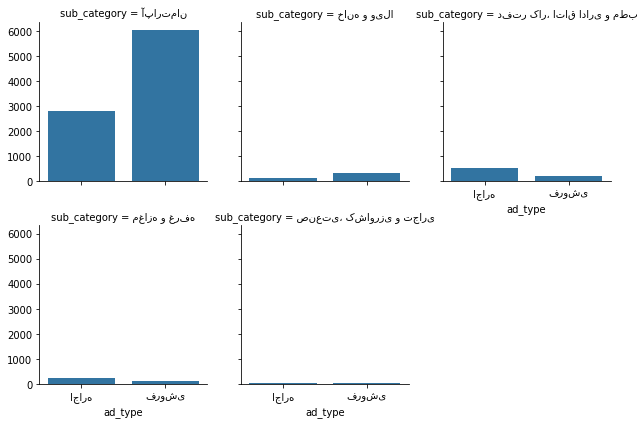

In [39]:
# g = sns.FacetGrid(data=df2, col='sub_category')
# g.map(plt.hist, 'age')

# g = sns.FacetGrid(data=df2, col='sub_category', hue='age')
# g.map(plt.scatter, 'rooms', 'area')
# g.add_legend()

g = sns.FacetGrid(data=df2, col='sub_category', col_wrap=3)
g.map(sns.countplot, 'ad_type')

plt.show()

/home/rasoul/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


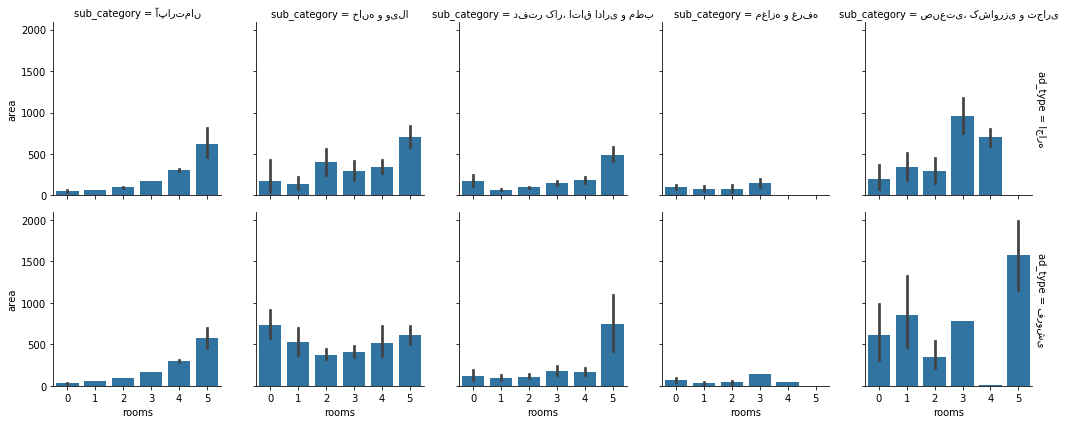

In [59]:
g = sns.FacetGrid(data=df2, row='ad_type', col='sub_category', margin_titles=True)
g.map(sns.barplot, 'rooms', 'area')
# g.map(plt.hist, 'area')
g.add_legend()
plt.show()

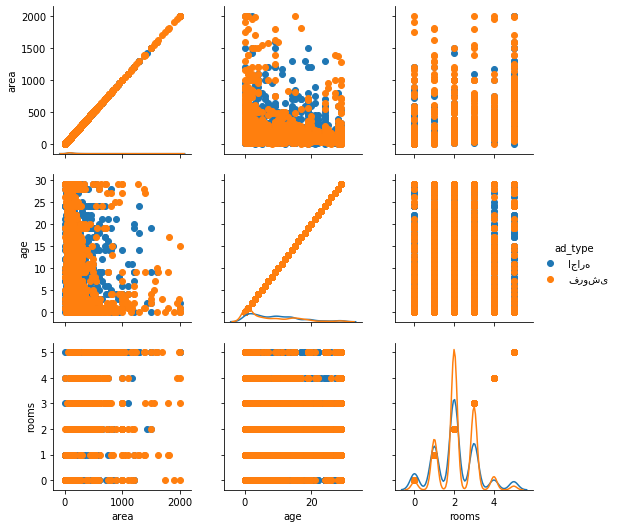

In [61]:
g = sns.PairGrid(data=df2, vars=['area', 'age', 'rooms'], hue='ad_type')
g.map(plt.scatter)
g.map_diag(sns.kdeplot)
g.add_legend()
plt.show()

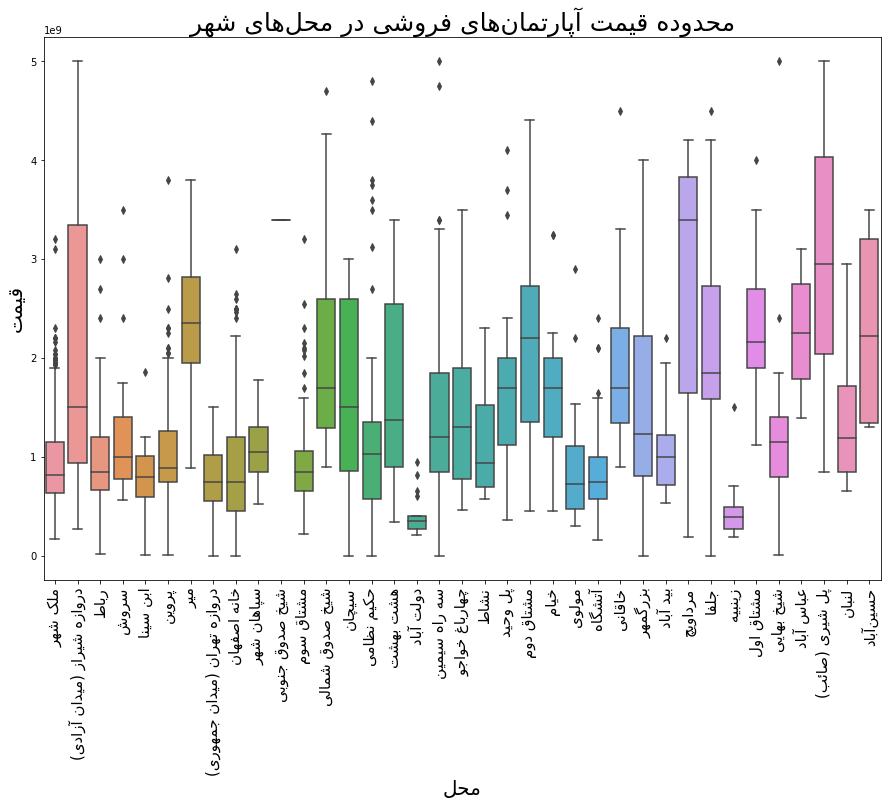

In [81]:
df_temp = df_sell_apartment[df_sell_apartment['sell_price'] <= 5e9]
plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='location', y='sell_price', data=df_temp)
ax.set_title(PersianText.reshape('محدوده قیمت آپارتمان‌های فروشی در محل‌های شهر'), fontsize=25)
ax.set_xlabel(PersianText.reshape('محل'), fontsize=20)
ax.set_ylabel(PersianText.reshape('قیمت'), fontsize=20)
reshape_axes_labels(ax)
plt.xticks(rotation=90, fontsize=15)
plt.show()
# plt.savefig('isrs-10.png')

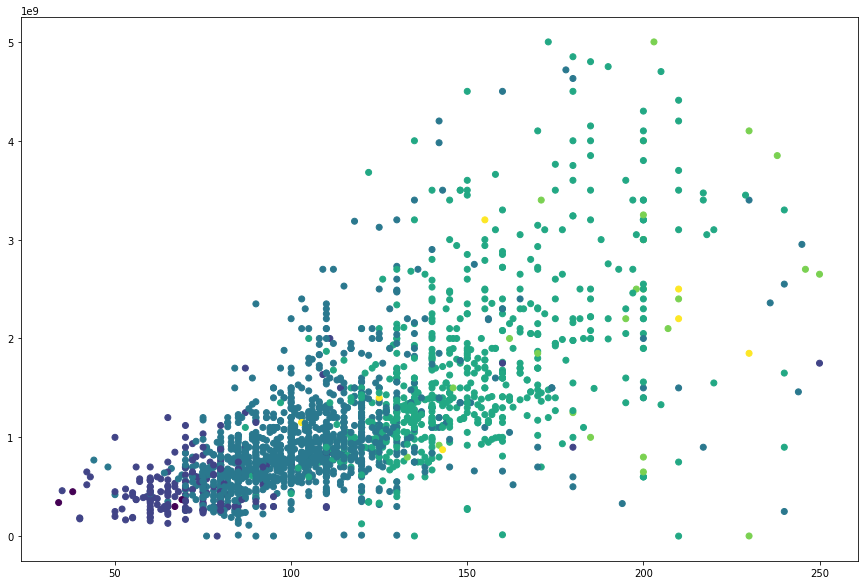

In [17]:
df_temp = df_sell_apartment[(df_sell_apartment['sell_price'] <= 5e9) & (df_sell_apartment['area'] <= 250)]
plt.subplots(figsize=(15, 10))
# ax = sns.scatterplot(x='area', y='sell_price', hue='rooms', data=df_temp)
# ax = sns.scatterplot(x='area', y='sell_unit_price', data=df_temp)
# ax = sns.scatterplot(x='area', y='sell_price', data=df_temp)
plt.scatter(x=df_temp['area'], y=df_temp['sell_price'], c=df_temp['rooms'])
plt.show()

# Clustering

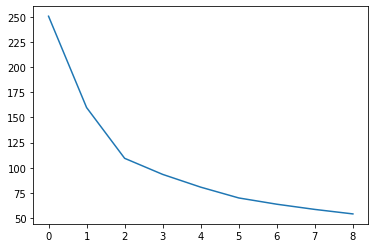

In [35]:
cols = ['age', 'rooms', 'area', 'sell_price']
df_temp = df_sell_apartment[(df_sell_apartment['sell_price'] <= 5e9) & (df_sell_apartment['area'] <= 250)]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_temp[cols].values.astype(np.float))
wcss = []
for k in range(1, 10):
    km = KMeans(k)
    km.fit(scaled_data)
    wcss.append(km.inertia_)
plt.plot(wcss)
plt.show()

In [83]:
df_temp = df_sell_apartment[(df_sell_apartment['sell_price'] <= 5e9) & (df_sell_apartment['area'] <= 250)].copy()
loc_weights = df_temp['location'].value_counts()
df_temp['location_weight'] = df_temp['location'].apply(lambda x: loc_weights[x])

# cols = ['location_weight', 'age', 'rooms', 'area', 'sell_price']
cols = ['location_weight', 'age', 'area', 'sell_price']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_temp[cols].values.astype(np.float))

km = KMeans(4)
# km.fit(df_sell_apartment[cols])
clusters = km.fit_predict(scaled_data)
df_clusters = df_temp.copy()
df_clusters['cluster'] = clusters

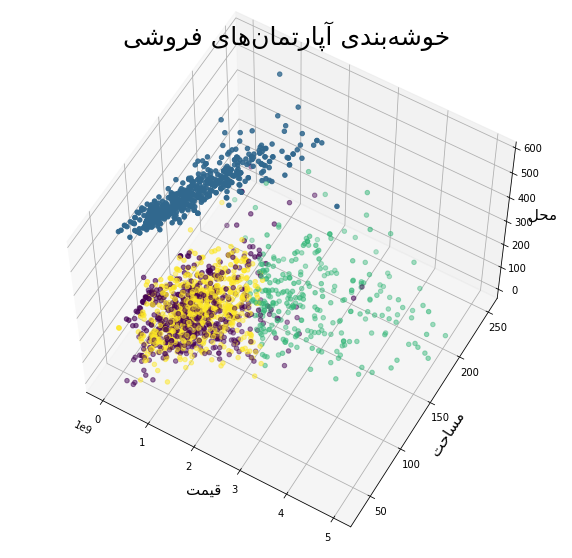

In [87]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# xs = df_clusters['location_weight'].values.astype(np.float)
xs = df_clusters['sell_price'].values.astype(np.float)
ys = df_clusters['area'].values.astype(np.float)
zs = df_clusters['location_weight'].values.astype(np.float)
types = df_clusters['cluster'].values

ax.scatter(xs, ys, zs, c=types, cmap='viridis') #, marker='o')

ax.set_title(PersianText.reshape('خوشه‌بندی آپارتمان‌های فروشی'), fontsize=25)
ax.set_xlabel(PersianText.reshape('قیمت'), fontsize=15)
ax.set_ylabel(PersianText.reshape('مساحت'), fontsize=15)
ax.set_zlabel(PersianText.reshape('محل'), fontsize=15)

ax.view_init(60, -60)

plt.show()
# plt.savefig('isrs-11.png')

<a name="tests"></a>
# Tests

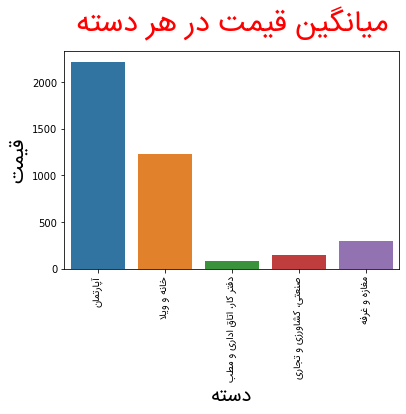

In [48]:
ax = sns.barplot(x='sub_category', y='sell_price', data=df_sell, errwidth=0)
# ax = sns.countplot(x='sub_category', data=df_sell)
reshape_axes_labels(ax, fontsize=10)
plt.xticks(rotation=90)
plt.title(PersianText.reshape('میانگین قیمت در هر دسته'), fontproperties=get_font_properties(fontsize=30), color='red', pad=20)
plt.xlabel(PersianText.reshape('دسته'), fontproperties=get_font_properties(fontsize=20))
plt.ylabel(PersianText.reshape('قیمت'), fontproperties=get_font_properties(fontsize=20))
plt.show()

/home/rasoul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


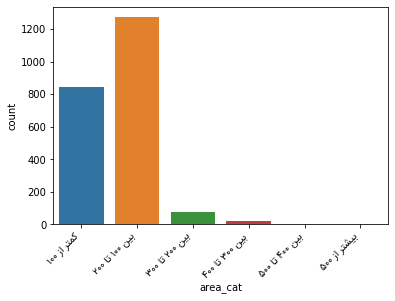

In [65]:
##### area range

area_cat_labels = ('کمتر از ۱۰۰', 'بین ۱۰۰ تا ۲۰۰', 'بین ۲۰۰ تا ۳۰۰', 'بین ۳۰۰ تا ۴۰۰', 'بین ۴۰۰ تا ۵۰۰', 'بیشتر از ۵۰۰')
df_sell_apartment['area_cat'] = pd.cut(df_sell_apartment['area'], bins=(0, 100, 200, 300, 400, 500, 600), labels=area_cat_labels)
# ax = sns.barplot(x=df_sell_apartment['area_cat'], y=df_sell_apartment['sell_price']/df_sell_apartment['area'])
ax = sns.countplot(x=df_sell_apartment['area_cat'])
reshape_axes_labels(ax, fontsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

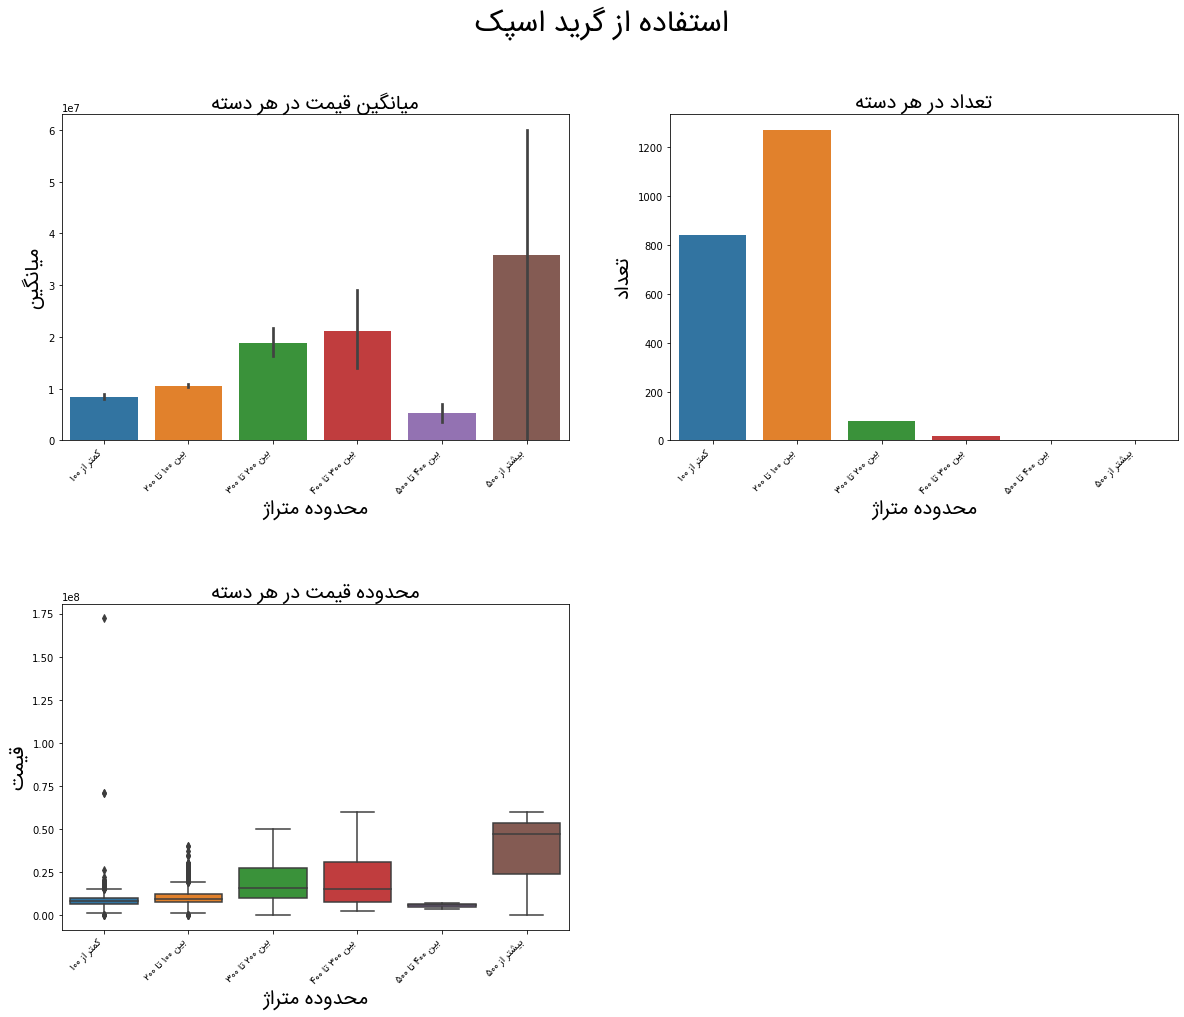

In [95]:
plt.figure(2, figsize=(20,15))
the_grid = GridSpec(nrows=2, ncols=2, hspace=0.50)

plt.subplot(the_grid[0, 1])
ax = sns.countplot(x=df_sell_apartment['area_cat'])
reshape_axes_labels(ax, fontsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title(PersianText.reshape('تعداد در هر دسته'), fontproperties=get_font_properties(20))
plt.xlabel(PersianText.reshape('محدوده متراژ'), fontproperties=get_font_properties(20))
plt.ylabel(PersianText.reshape('تعداد'), fontproperties=get_font_properties(20))

plt.subplot(the_grid[0, 0])
ax = sns.barplot(x='area_cat', y='sell_unit_price', data=df_sell_apartment)
reshape_axes_labels(ax, fontsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title(PersianText.reshape('میانگین قیمت در هر دسته'), fontproperties=get_font_properties(20))
plt.xlabel(PersianText.reshape('محدوده متراژ'), fontproperties=get_font_properties(20))
plt.ylabel(PersianText.reshape('میانگین'), fontproperties=get_font_properties(20))

plt.subplot(the_grid[1, 0])
ax = sns.boxplot(x='area_cat', y='sell_unit_price', data=df_sell_apartment)
reshape_axes_labels(ax, fontsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title(PersianText.reshape('محدوده قیمت در هر دسته'), fontproperties=get_font_properties(20))
plt.xlabel(PersianText.reshape('محدوده متراژ'), fontproperties=get_font_properties(20))
plt.ylabel(PersianText.reshape('قیمت'), fontproperties=get_font_properties(20))

plt.suptitle(PersianText.reshape('استفاده از گرید اسپک'), fontproperties=get_font_properties(30))

plt.show()

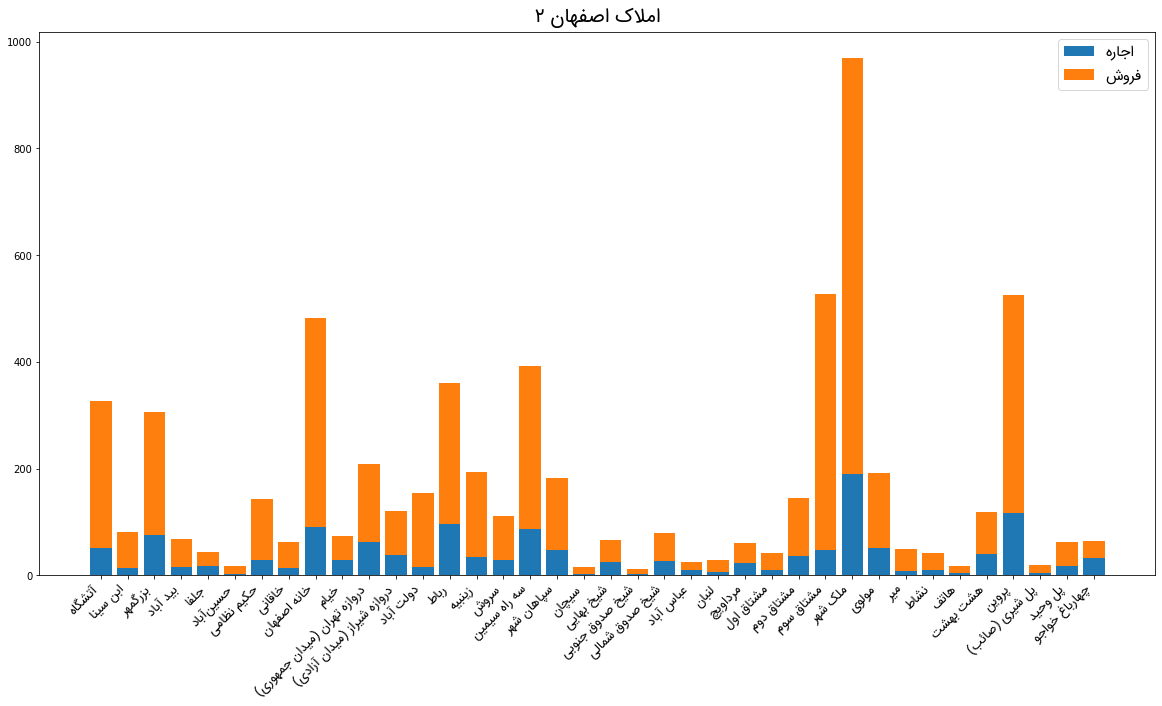

In [74]:

# plt.figure(figsize=(20,16))
# g = GridSpec(1, 2)
# stacked_bar(groupby=['ad_type', 'sub_category'], data=df2, title='املاک اصفهان ۱', grid_cell=g[0,0])
# stacked_bar(groupby=['sub_category', 'ad_type'], data=df2, title='املاک اصفهان ۱', grid_cell=g[0,0])
# stacked_bar(groupby=['ad_type', 'sub_category'], data=df2, title='املاک اصفهان ۲', grid_cell=g[0,1])
stacked_bar(stacked_group='ad_type', x='location', data=df2, title='املاک اصفهان ۲', figsize=(20, 10))
plt.show()



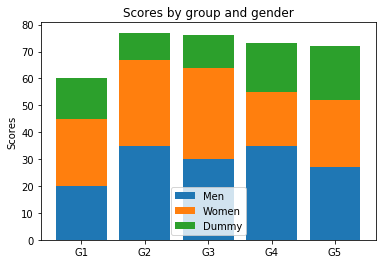

In [59]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
dummy_means = [15, 10, 12, 18, 20]
# width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

# ax.bar(labels, men_means, width, label='Men', bottom=np.zeros(len(men_means)))
# ax.bar(labels, women_means, width, bottom=men_means, label='Women')
# ax.bar(labels, dummy_means, width, bottom=np.array(men_means)+np.array(women_means), label='Dummy')
ax.bar(labels, men_means, label='Men', bottom=np.zeros(len(men_means)))
ax.bar(labels, women_means, bottom=men_means, label='Women')
ax.bar(labels, dummy_means, bottom=np.array(men_means)+np.array(women_means), label='Dummy')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [137]:
import datetime
import jalali
d = str(datetime.datetime.now().date())
jalali.Gregorian(d).persian_string(date_format='{}-{:02d}-{:02d}')

'1399-03-19'

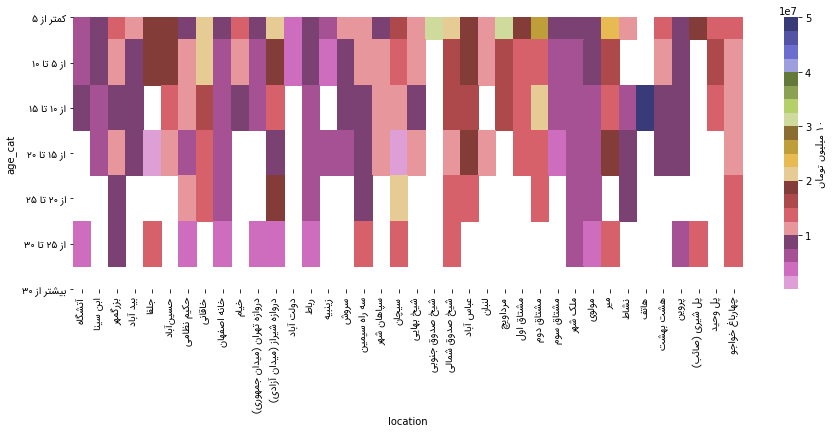

In [158]:
df_temp = df_sell_apartment[['location', 'age_cat', 'sell_unit_price']]
agg = df_temp.groupby(by=['age_cat', 'location']).mean()
agg = agg.unstack()
agg.columns = agg.columns.get_level_values(1)
# agg = agg.fillna(0)

# heatmap(data=agg, title='قیمت به نسبت محل و سن', xlabel='محل', ylabel='سن', cbar_label='۱۰ میلیون', figsize=(20, 5))
plt.figure(figsize=(15, 5))
ax = sns.heatmap(agg, cmap='tab20b_r', cbar_kws={'label':PersianText.reshape('۱۰ میلیون تومان')})
reshape_axes_labels(ax, reshape_y=True)
plt.show()